# **Yếu tố ảnh hưởng đến lượng mưa**


1.   **Khí áp**:
  - Các khu áp thấp mưa nhiều, các khu áp cao mưa ít
  - Ở khu khí áp thấp hút gió và tiếp tục đẩy không khí ấm lên cao nên sinh ra mây, mây gặp nhiệt độ thấp sinh ra mưa.
  - Ở các khu khí áp cao, không khí ẩm không bộc lên được, lại chỉ có gió thổi đi, không có gió thổi đến, nên mưa rơi ít hoặc không có mưa.
2.   **Frong**:
  - Miền có frong nhiều nhất là dải hội tụ nhiệt đới đi qua mưa nhiều
3.   **Dòng biển**:
  - Nơi có dòn biển nóng chảy ven bờ mưa nhiều
4.   **Địa hình**:
  - Cùng một dãy núi sườn núi nào đón gió thì mưa nhiều, khuất gió mưa ít, khô
5.   **Gió**:
  - Nếu không có gió từ đại dương thổi vào thì mưa rất ít. Ở đây, mưa chủ yếu là do ngưng kết hơi nước từ ao, hồ, sông,.... bố hơi lên tạo thành mưa.
  - Miền có gió mậu dịch  mưa ít vì gió mậu dịch là gió khô.
  - Miền có gió mùa mưa nhiều.

# **Khí hậu Nước Úc**
Nước úc gồm 6 bang và 2 vùng lãnh thổ mang các đặc trung khí hậu cũng không
có sự khác biệt nhiều. <br>

Tuy diện tích lớn nhưng 80% dân số sống ở các khu vực ven biển với thời tiết ôn hòa dễ chịu. Gần 1\3 nước Úc là khí hậu nhiệt đới và phần còn lại là khu vực khí hậu ôn đới. <br>

Úc cũng là châu lục khô nhất trên trái đất với lượng mưa trung bình hàng năm ít hơn 600 mm. <br>

Thời tiết ở Úc ôn hòa hầu như quanh năm, tuy nhiên khí hậu có thể thay đổi do kích thước rộng lớn của châu lục này.

# **Các muà tại Úc**


*   Mùa Hè: tháng Mười Hai – tháng Hai
*   Mùa Thu: tháng Ba – tháng Năm
*   Mùa Đông: tháng Sáu – tháng Tám
*   Mùa Xuân: tháng Chín – tháng Mười Một
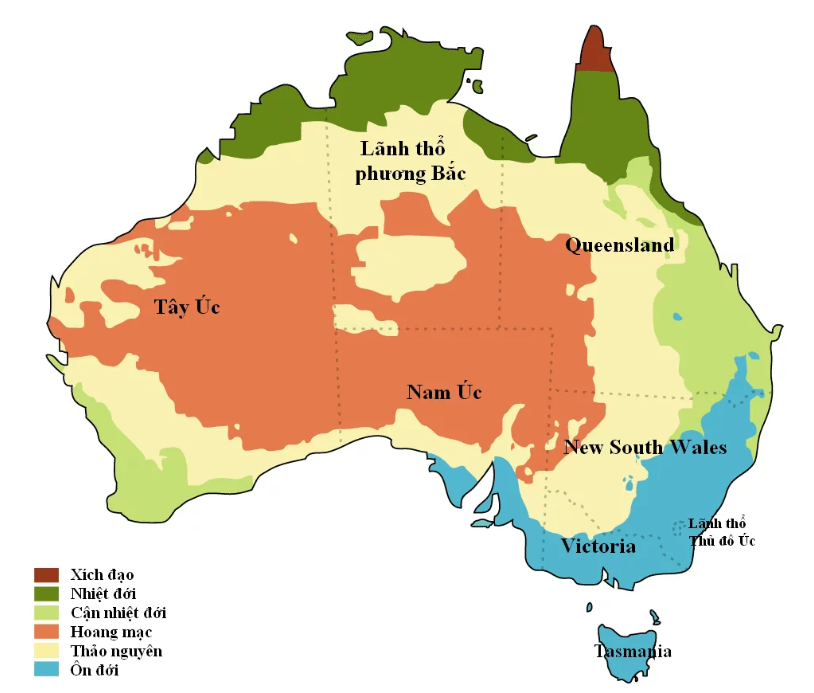

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np

from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
import calendar

import matplotlib.pyplot as plt
from matplotlib import style
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score,classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
sns.set_theme()

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DataMining/weatherAUS.xlsx')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# **EXPLORATORY DATA**

In [3]:
# tạo ra 1 bản sao của dữ liệu để khám phá tránh sự sai sót trên tập ban đầu
data = df.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  



   **Nhận xét :**

*   Cột "Date" không cần chuyển đổi sang kiểu dữ liệu datetime
*   Có 2 kiểu dữ liệu: object và float64
*   Xuất hiện khá nhiều giá trị null ở nhiều thuộc tính


In [5]:
100 * data.isnull().sum().sort_values(ascending=False)/len(data)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

**Nhận xét :**


*   Evaporation, Sunshine, Cloud9am, Cloud3pm có giá trị null trên 35%
*   Ngoài Date và Location, tất cả các thuộc tính còn lại đều có giá trị null



In [6]:
size_before = len(data)
data = data.drop_duplicates()
size_after = len(data)
print(str(size_before - size_after) + " dòng đã xóa")

0 dòng đã xóa


In [7]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

**Nhận xét :**


*   Nhiều cột có giá trị ngoại lai một cách rõ rệt
*   Không thấy có bất kỳ giá trị nào gây ảnh hưởng tiêu cực đến thuộc tính



In [8]:
data.describe(include='object')

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
count     145460      135134     134894     141232    142199       142193
unique        49          16         16         16         2            2
top     Canberra           W          N         SE        No           No
freq        3436        9915      11758      10838    110319       110316

In [9]:
#Check unique values for all columns in a DataFrame
for column in df.columns:
     unique_values = data[column].unique()
     print(f"Column '{column}' has {len(unique_values)} unique values:")
     print(unique_values)
     print("\n")

Column 'Date' has 3436 unique values:
['2008-12-01T00:00:00.000000000' '2008-12-02T00:00:00.000000000'
 '2008-12-03T00:00:00.000000000' ... '2008-01-29T00:00:00.000000000'
 '2008-01-30T00:00:00.000000000' '2008-01-31T00:00:00.000000000']


Column 'Location' has 49 unique values:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


Column 'MinTemp' has 390 unique values:
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 

In [10]:
# thống kê top 5 tần suất xuất hiện nhiều nhất của từng columns
for col in data.columns:
    print('\n')
    print(col)
    print('-'*15)
    print(data[col].value_counts(normalize=True).head())



Date
---------------
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
Name: Date, dtype: float64


Location
---------------
Canberra     0.023622
Sydney       0.022989
Darwin       0.021951
Melbourne    0.021951
Brisbane     0.021951
Name: Location, dtype: float64


MinTemp
---------------
11.0    0.006244
10.2    0.006237
9.6     0.006223
10.5    0.006140
9.0     0.006057
Name: MinTemp, dtype: float64


MaxTemp
---------------
20.0    0.006137
19.0    0.005846
19.8    0.005825
20.4    0.005784
19.9    0.005707
Name: MaxTemp, dtype: float64


Rainfall
---------------
0.0    0.640511
0.2    0.061611
0.4    0.026597
0.6    0.018228
0.8    0.014459
Name: Rainfall, dtype: float64


Evaporation
---------------
4.0    0.040390
8.0    0.031559
2.2    0.025342
2.0    0.024580
2.4    0.024229
Name: Evaporation, dtype: float64


Sunshine
---------------
0.0     0.031193
10.7    0.014559
11.0    0.014466
10.8    0.014136
10.5    

**Nhận xét :**


*   Có sự **ngắt kết nối** giữa số lượng giá trị Rainfall và số lượng giá trị RainToday / RainTomorrow. Trong khi khoảng 64% các quan sát có giá trị bằng 0 đối với Rainfall, khoảng 77,5% số ngày không có lượng mưa của RainToday / RainTomorrow. Sự khác biệt này có thể là do sự khác biệt về số lượng giá trị bị thiếu cho mỗi cột

In [11]:
print(f"Ngày bắt đầu của thuộc tính Date: '{data['Date'].min()}'")
print(f"Ngày kết thúc của thuộc tính Date: '{data['Date'].max()}'")

Ngày bắt đầu của thuộc tính Date: '2007-11-01 00:00:00'
Ngày kết thúc của thuộc tính Date: '2017-06-25 00:00:00'


In [12]:
values_location = data['Location'].unique()

for locations in values_location:
  date_start = data[data['Location'].values==locations]['Date'].min()
  date_end = data[data['Location'].values==locations]['Date'].max()
  print(f"Ngày bắt đầu khảo sát của ' {locations}': {date_start}")
  print(f"Ngày kết thúc khảo sát của ' {locations}': {date_end}")
  print('\n')

Ngày bắt đầu khảo sát của ' Albury': 2008-12-01 00:00:00
Ngày kết thúc khảo sát của ' Albury': 2017-06-25 00:00:00


Ngày bắt đầu khảo sát của ' BadgerysCreek': 2009-01-01 00:00:00
Ngày kết thúc khảo sát của ' BadgerysCreek': 2017-06-25 00:00:00


Ngày bắt đầu khảo sát của ' Cobar': 2009-01-01 00:00:00
Ngày kết thúc khảo sát của ' Cobar': 2017-06-25 00:00:00


Ngày bắt đầu khảo sát của ' CoffsHarbour': 2009-01-01 00:00:00
Ngày kết thúc khảo sát của ' CoffsHarbour': 2017-06-25 00:00:00


Ngày bắt đầu khảo sát của ' Moree': 2009-01-01 00:00:00
Ngày kết thúc khảo sát của ' Moree': 2017-06-25 00:00:00


Ngày bắt đầu khảo sát của ' Newcastle': 2008-12-01 00:00:00
Ngày kết thúc khảo sát của ' Newcastle': 2017-06-24 00:00:00


Ngày bắt đầu khảo sát của ' NorahHead': 2009-01-01 00:00:00
Ngày kết thúc khảo sát của ' NorahHead': 2017-06-25 00:00:00


Ngày bắt đầu khảo sát của ' NorfolkIsland': 2009-01-01 00:00:00
Ngày kết thúc khảo sát của ' NorfolkIsland': 2017-06-25 00:00:00


Ngày bắt đầu khả

In [13]:
#Để truy xuất tọa độ chính xác với Nominatim,
#chúng ta cần tên thành phố được viết chính xác
badly_named = {"AliceSprings":"Alice Springs",
               "BadgerysCreek":"Badgerys Creek",
               "CoffsHarbour": "Coffs Harbour",
               "GoldCoast": "Gold Coast",
               "MelbourneAirport": "Melbourne Airport",
               "MountGambier": "Mount Gambier",
               "MountGinini": "Mount Ginini",
               "NorahHead": "Norah Head",
               "NorfolkIsland": "Norfolk Island",
               "PearceRAAF": "Pearce RAAF",
               "PerthAirport": "Perth Airport",
               "SalmonGums": "Salmon Gums",
               "SydneyAirport": "Sydney Airport",
               "WaggaWagga": "Wagga Wagga"}
data["Location"] = data["Location"].apply(lambda x: badly_named[x] if x in badly_named.keys() else x)

In [14]:
geolocator = Nominatim(user_agent="null")
#
latitude = []
longitude = []
#
for k in data["Location"].unique():
    search_ = k + ", Australia"
    location = geolocator.geocode(search_)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
#
latitude = dict(zip(data["Location"].unique(), latitude))
longitude = dict(zip(data["Location"].unique(), longitude))

In [15]:
data["longitude"] = data["Location"].map(longitude)
data["latitude"] = data["Location"].map(latitude)

In [16]:
center_location = [-25.3455545, 131.036961]
m = folium.Map(location=center_location, control_scale=True, zoom_start=4)#, tiles="Stamen terrain")

In [17]:
heatmap_data = data[['latitude', 'longitude', 'Rainfall']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist()
gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}
HeatMap(data=heatmap_data, radius=15, gradient=gradient, max_zoom=1).add_to(m)
m

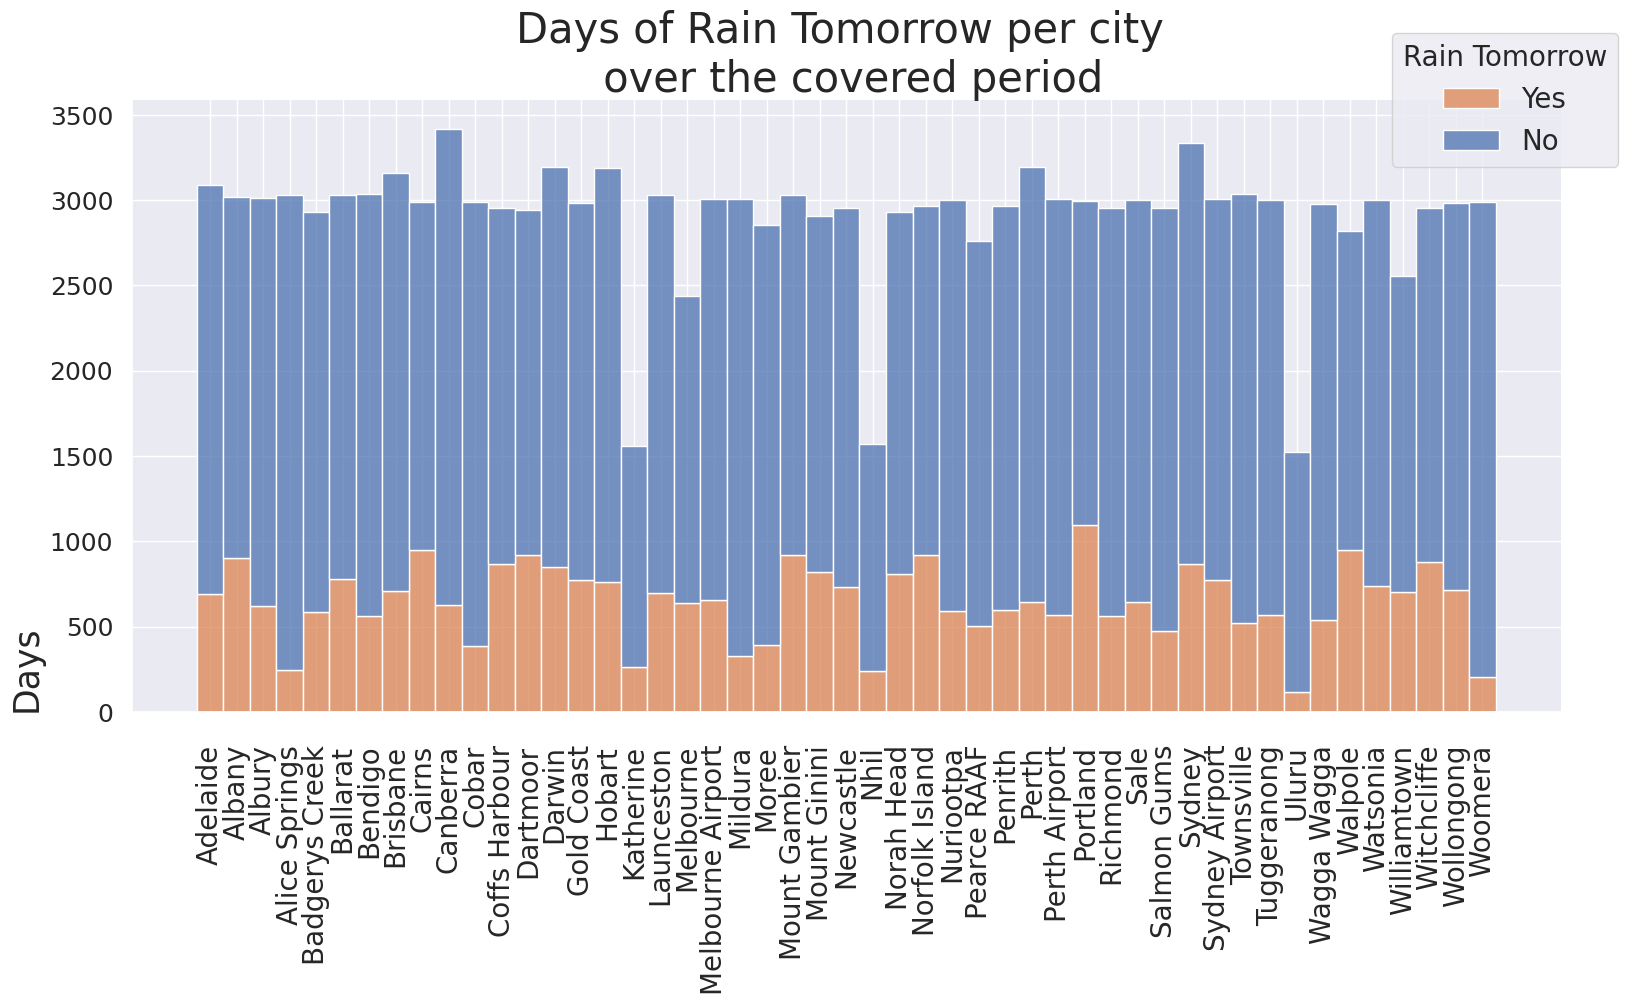

In [18]:
def barplot_rainTomorrow(df):
    df.sort_values(by="Location", inplace=True)
    ax = sns.displot(data=df,x="Location", hue="RainTomorrow",multiple="stack", aspect=2.2, height=7, legend=False);
    plt.tick_params(axis='y', rotation=0, size=10, labelsize=18)
    plt.xlabel("", fontdict={"fontsize":25})
    plt.ylabel("Days", fontdict={"fontsize":25}, loc="bottom")
    plt.tick_params(axis='x', rotation=90, size=20, labelsize=20, top=False)
    plt.tick_params(axis='y', right=False)
    plt.legend(["Yes","No"], title="Rain Tomorrow", title_fontsize=20, fontsize=20, loc='right', bbox_to_anchor=(1.05, 1));
    plt.title("Days of Rain Tomorrow per city \n over the covered period", fontsize=30);
    plt.savefig('/content/sample_data/days_of_RainTomorrow.png', facecolor='white', dpi=100);

barplot_rainTomorrow(data)

**Nhận xét :**


*   Có tới 49 vùng được khảo sát trên toàn bộ nước úc.
*   49 vùng này có ngày bắt đầu khảo sát không giống nhau.



In [19]:
data.RainToday = data.RainToday.map({'No': 0, 'Yes': 1})
data.RainTomorrow = data.RainTomorrow.map({'No': 0, 'Yes': 1})

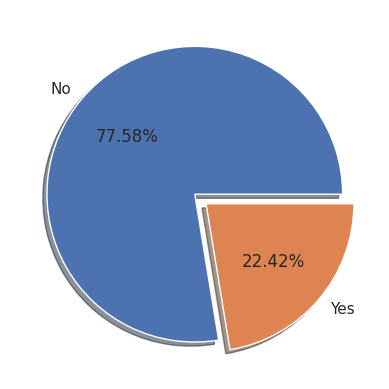

In [20]:
sizes = [data.RainTomorrow[data['RainTomorrow']==0].count(),data.RainTomorrow[data['RainTomorrow']==1].count()]
labels = ['No', 'Yes']
plt.pie(sizes, labels = labels, explode = (0,0.1), shadow=True, autopct='%.2f%%')
plt.show()

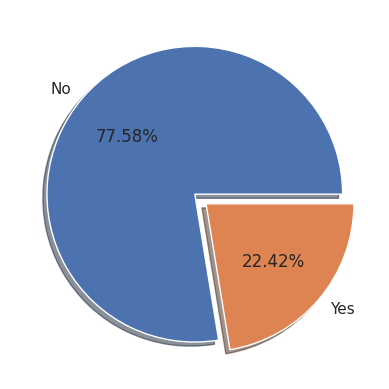

In [21]:
sizes = [data.RainToday[data['RainToday']==0].count(),data.RainToday[data['RainToday']==1].count()]
labels = ['No', 'Yes']
plt.pie(sizes, labels = labels, explode = (0,0.1), shadow=True, autopct='%.2f%%')
plt.show()

In [22]:
import plotly.express as px
def create_custom_bar_plot(df, x, y, color1, color2):
    # Calculate percentages
    percentages = (
        df.groupby([x, y])[y]
        .count()
        .groupby(level=0)
        .apply(lambda x: 100 * x / x.sum())
        .reset_index(name='Percentage')
    )

    # Generate the title
    title = f'{x} vs. {y}'

    # Create the bar plot
    fig = px.bar(
        percentages,
        x=x,
        y='Percentage',
        color=y,
        title=title,
        labels={'Percentage': 'Percentage of Total'},
        color_discrete_sequence=[color1, color2],  # Custom colors
    )

    # Update the layout
    fig.update_xaxes(categoryorder='array')  # Sort x-axis categories by percentage
    fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')
    fig.update_layout(
    title_font=dict(size=18),
    legend_title=dict(text=y),
    legend_font=dict(size=12),
    legend=dict(orientation='h', x=0.5, y=1.15))
    # Show the plot
    fig.show()


In [23]:
create_custom_bar_plot(data, 'RainToday', 'RainTomorrow',  '#08306B', '#98F5FF')

<ipython-input-22-ae450b01a9b7>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: 100 * x / x.sum())


**Nhận xét :**
- Nhìn 2 biểu tròn, cho ta thấy số lượng No và Yes của từng biến RainTomorrow và RainToday là như sau.<br>
- Mặc dù như vậy nhưng nhìn vào biểu đồ cột thì không thể nội suy từ biến RainToday để điền giá trị null cho biến RainTomorrow<br>
- Ngày hôm nay không có mưa thì ngày mai khoảng 84.81% sẽ không mưa.
- Ngày hôm nay có mưa thì ngày mai khoảng 53.59% sẽ không mưa.

**Visualazition**

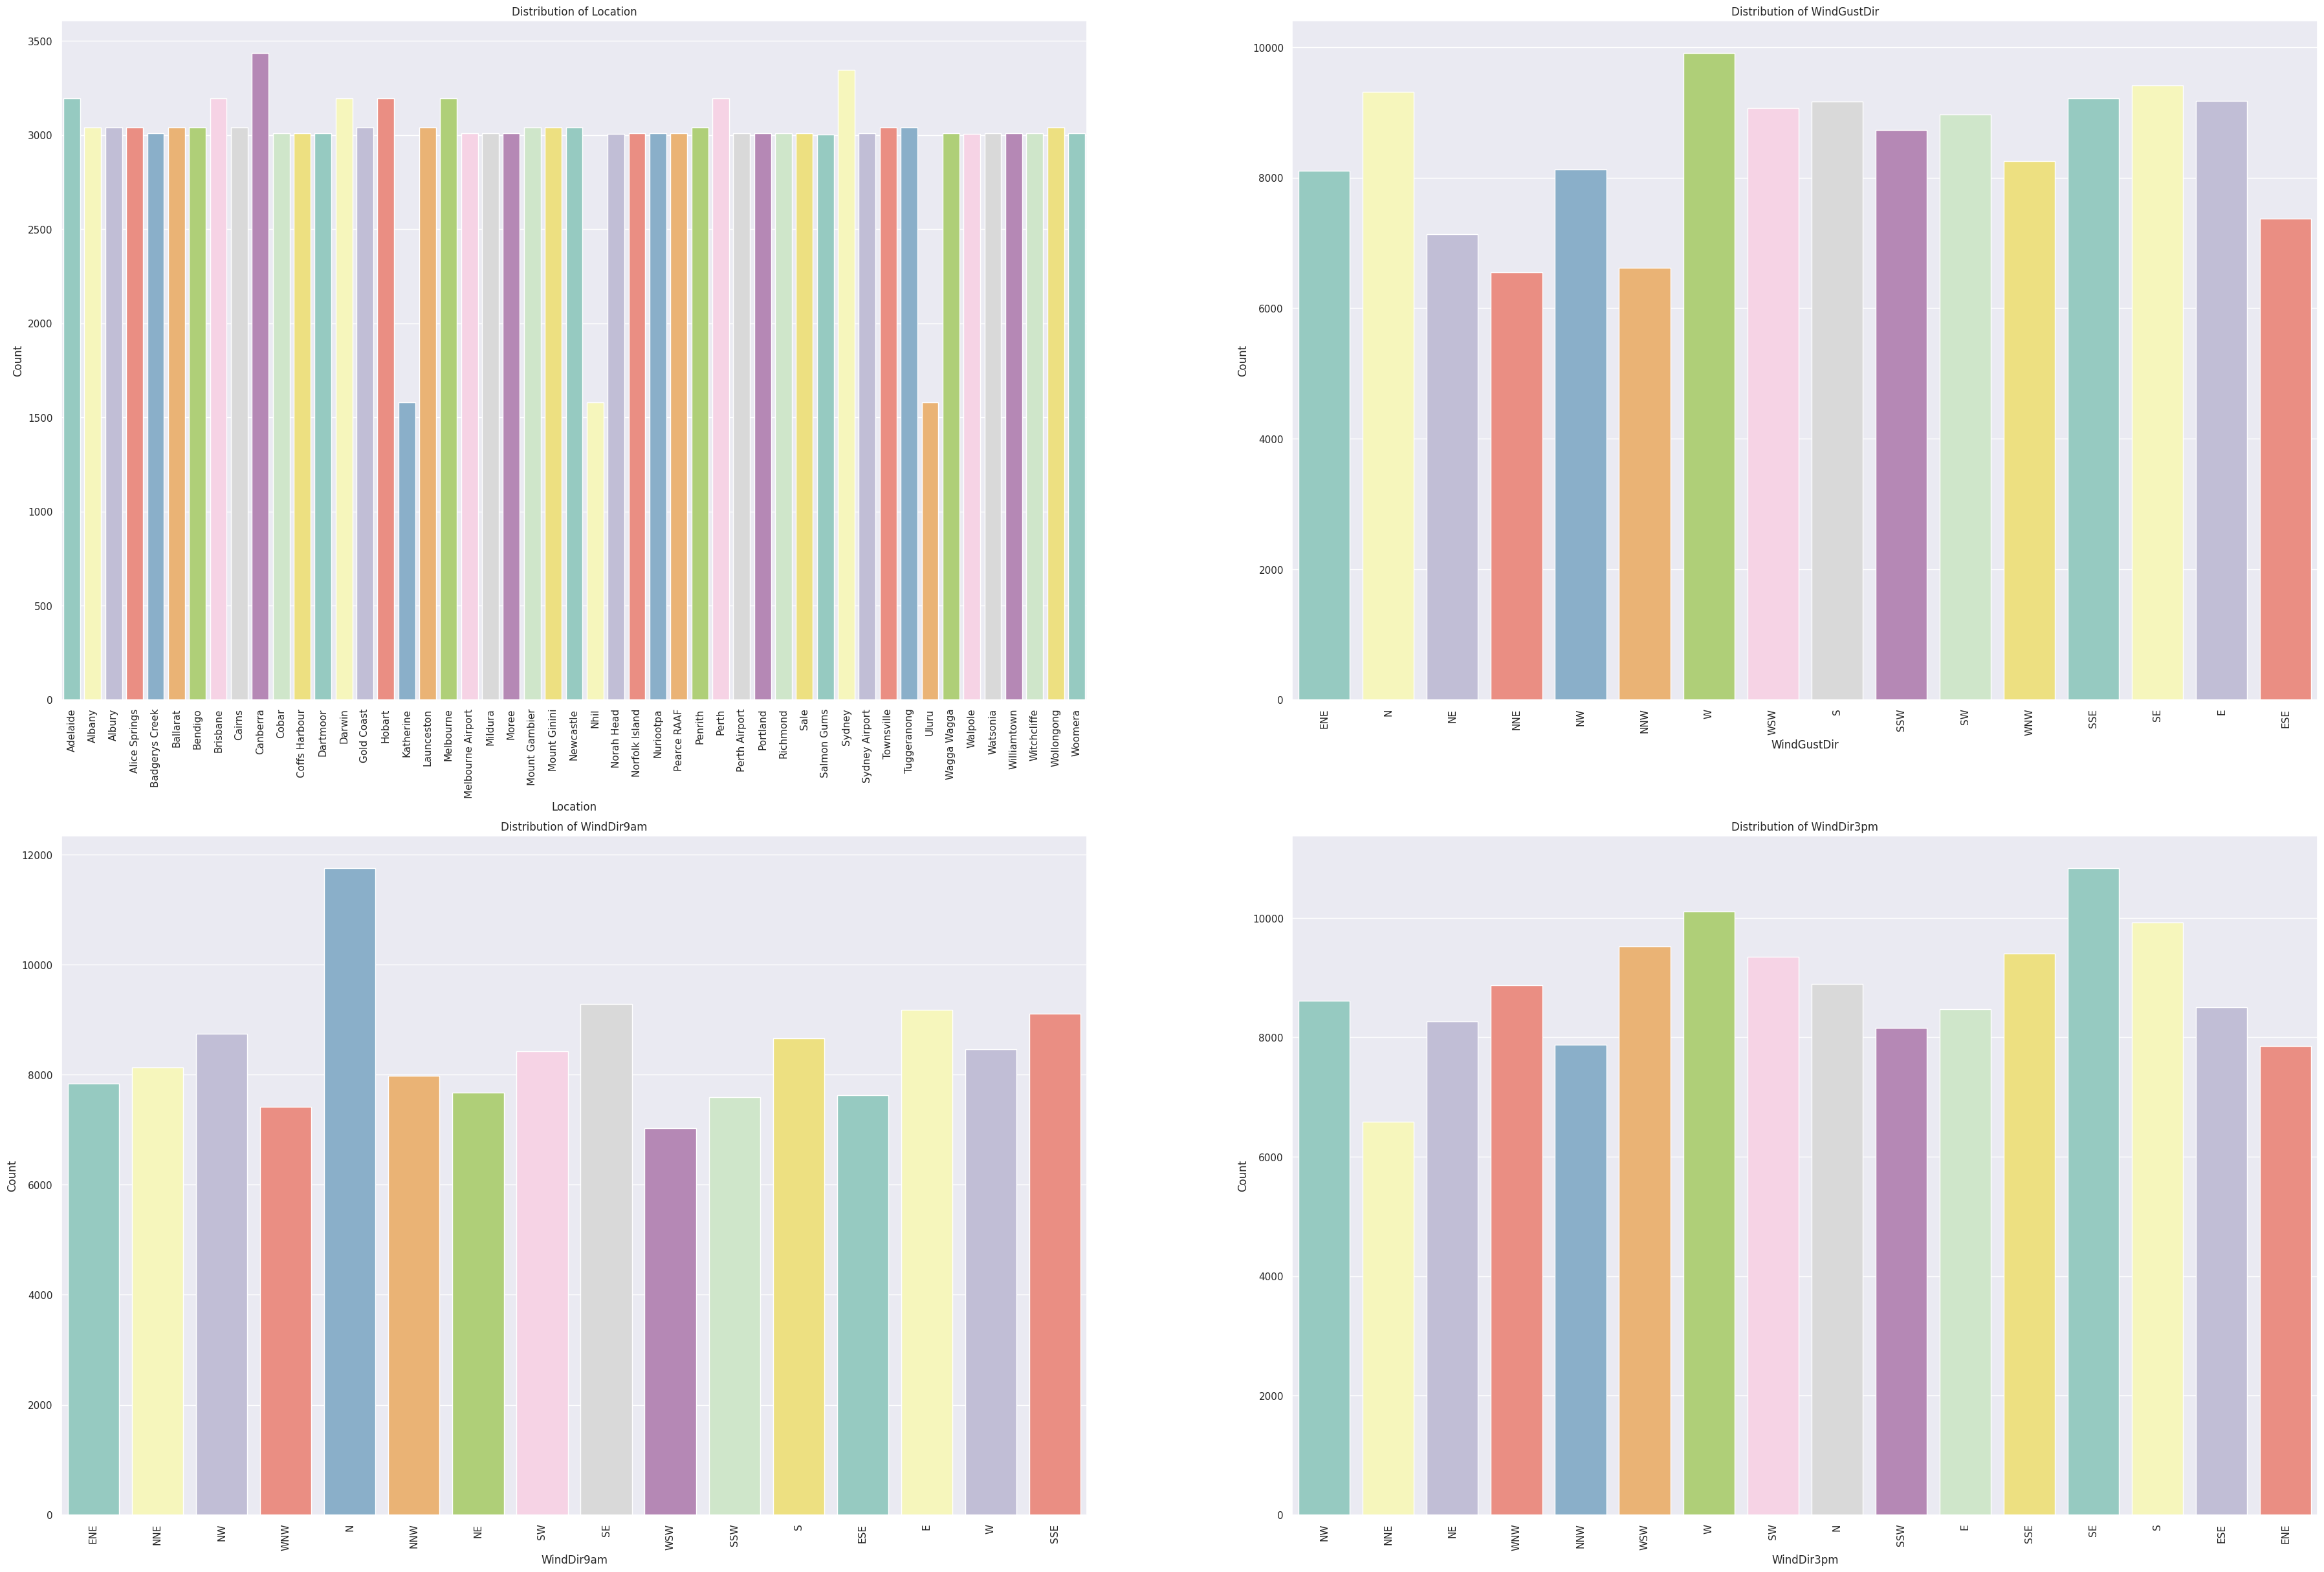

In [24]:
categorical_attributes = data.select_dtypes(include=['object']).columns
num_rows_cat = (len(categorical_attributes) - 1) // 2 + 1

# Create subplots for categorical attributes
plt.figure(figsize=(45, 15 * num_rows_cat))
for i, attr in enumerate(categorical_attributes):
    plt.subplot(num_rows_cat, 2, i + 1)
    sns.countplot(data=data, x=attr, palette='Set3')
    plt.xlabel(attr)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attr}')
    plt.xticks(rotation=90)

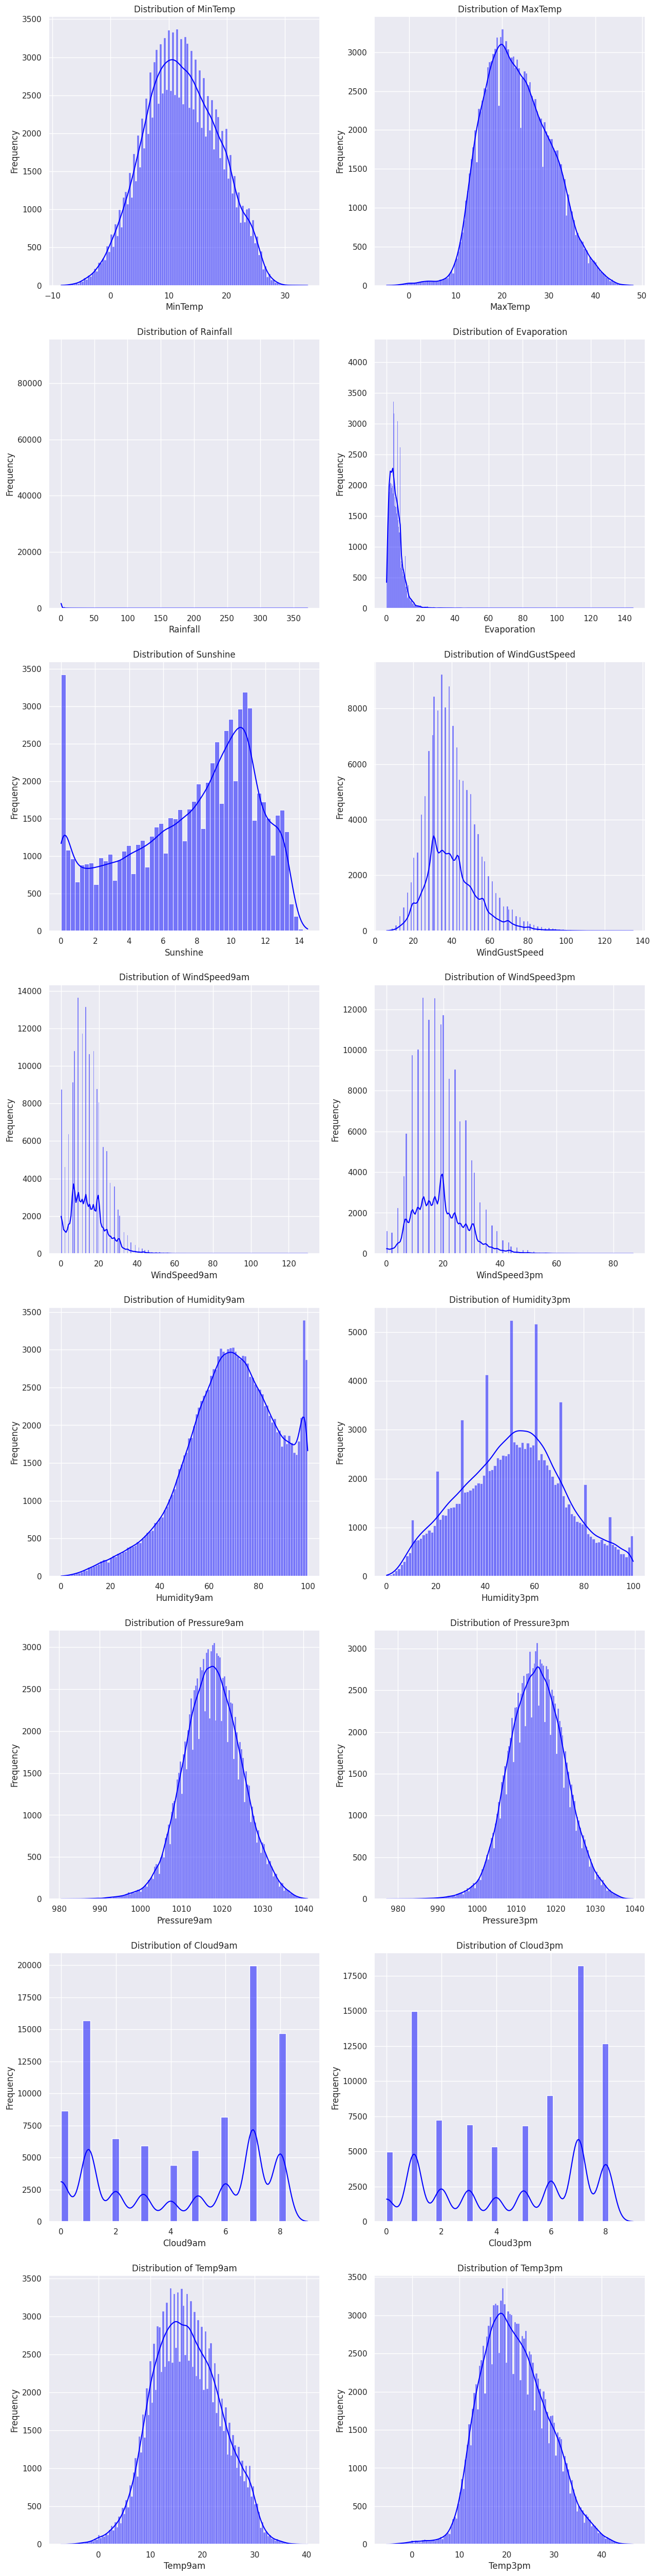

In [25]:
#The distribution of both numerical and categorical attributes
# Get the list of numerical attributes
numerical_attributes = df.select_dtypes(include=['number']).columns
num_rows_num = (len(numerical_attributes) - 1) // 2 + 1

# Create subplots for numerical attributes
plt.figure(figsize=(15, 8 * num_rows_num))
for i, attr in enumerate(numerical_attributes):
    plt.subplot(num_rows_num, 2, i + 1)
    sns.histplot(df[attr], kde=True, color='blue')
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {attr}')

**Nhận xét :**



*   Hầu hết các thuộc tính đều phân phối chuẩn như mong đợi
*   Sự phân bộ của Rainfall cần được xem xét vì sự ngoại lai khá nhiều và rõ rệt.
*   Sự phân bố của SunSshine rất thú vị:
  * Tần suất xuất hiện của giá trị 0 cao hơn đều đó có nghĩa là có nhiều ngày bị mây che mờ
  * Sự suy giảm đột ngột các giá trị sau 11 giờ là sự hạn chế của những ngày trong năm.
* Sự phân bố của Humidity9am có sự chuyển biến mạnh mẽ, tăng đột ngột 100%

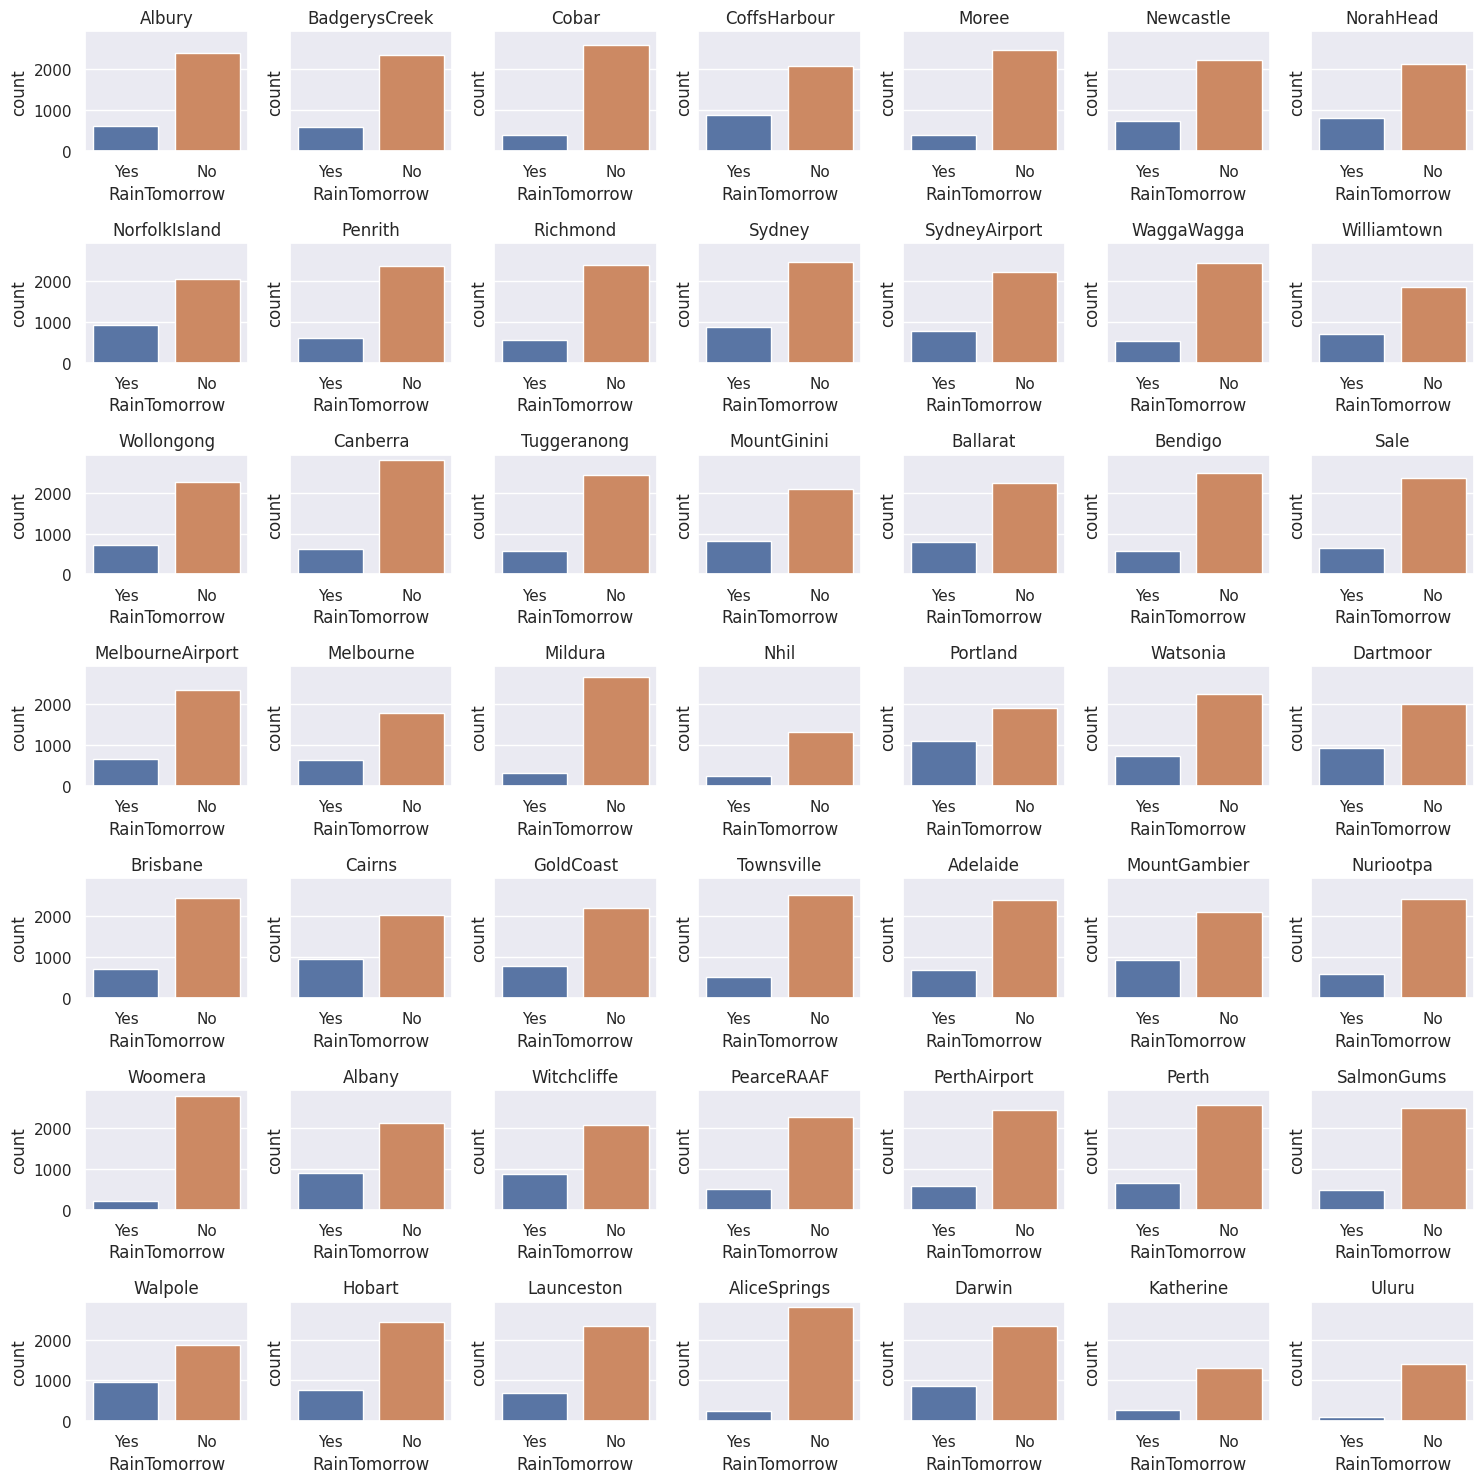

In [26]:
# Class imbalance by location
locations = df.Location.unique()
fig,ax = plt.subplots(7,7, figsize=(15,15),sharey=True,tight_layout=True)
ax_flat = ax.flatten()
i = 0
for location in locations:
    sns.countplot(data = df[df.Location == location], x = 'RainTomorrow', order = ['Yes','No'], ax=ax_flat[i])
    ax_flat[i].set_title(location)
    i = i + 1

In [27]:
# # Tạo một dataframe mới để lưu trữ kết quả sau khi loại bỏ outlier
# df_cleaned = df.copy()

# # Lặp qua từng vùng
# for location in df['Location'].unique():
#     # Tạo một subset chỉ chứa dữ liệu của vùng hiện tại và RainToday là "No"
#     subset = df[(df['Location'] == location) & (df['RainToday'] == 'No')]

#     # Xác định ngưỡng trên và ngưỡng dưới
#     Q1 = subset['Rainfall'].quantile(0.25)
#     Q3 = subset['Rainfall'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Loại bỏ các giá trị ngoại lệ trong subset
#     subset_cleaned = subset[(subset['Rainfall'] >= lower_bound) & (subset['Rainfall'] <= upper_bound)]

#     # Cập nhật dữ liệu trong dataframe gốc
#     df_cleaned.loc[(df_cleaned['Location'] == location) & (df_cleaned['RainToday'] == 'No'), 'Rainfall'] = subset_cleaned['Rainfall']

In [28]:
# for location in df['Location'].unique():
#     location_data = df[df['Location'] == location]
#     # Vẽ biểu đồ scatter plot
#     plt.figure(figsize=(20,8),facecolor='white')
#     sns.boxplot(data=location_data,x='RainToday',y='Rainfall')
#     plt.xlabel('RainToday')
#     plt.ylabel('Rainfall')
#     plt.title(location)
#     plt.show()

<ipython-input-29-751eebd7d4ae>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-29-751eebd7d4ae>:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



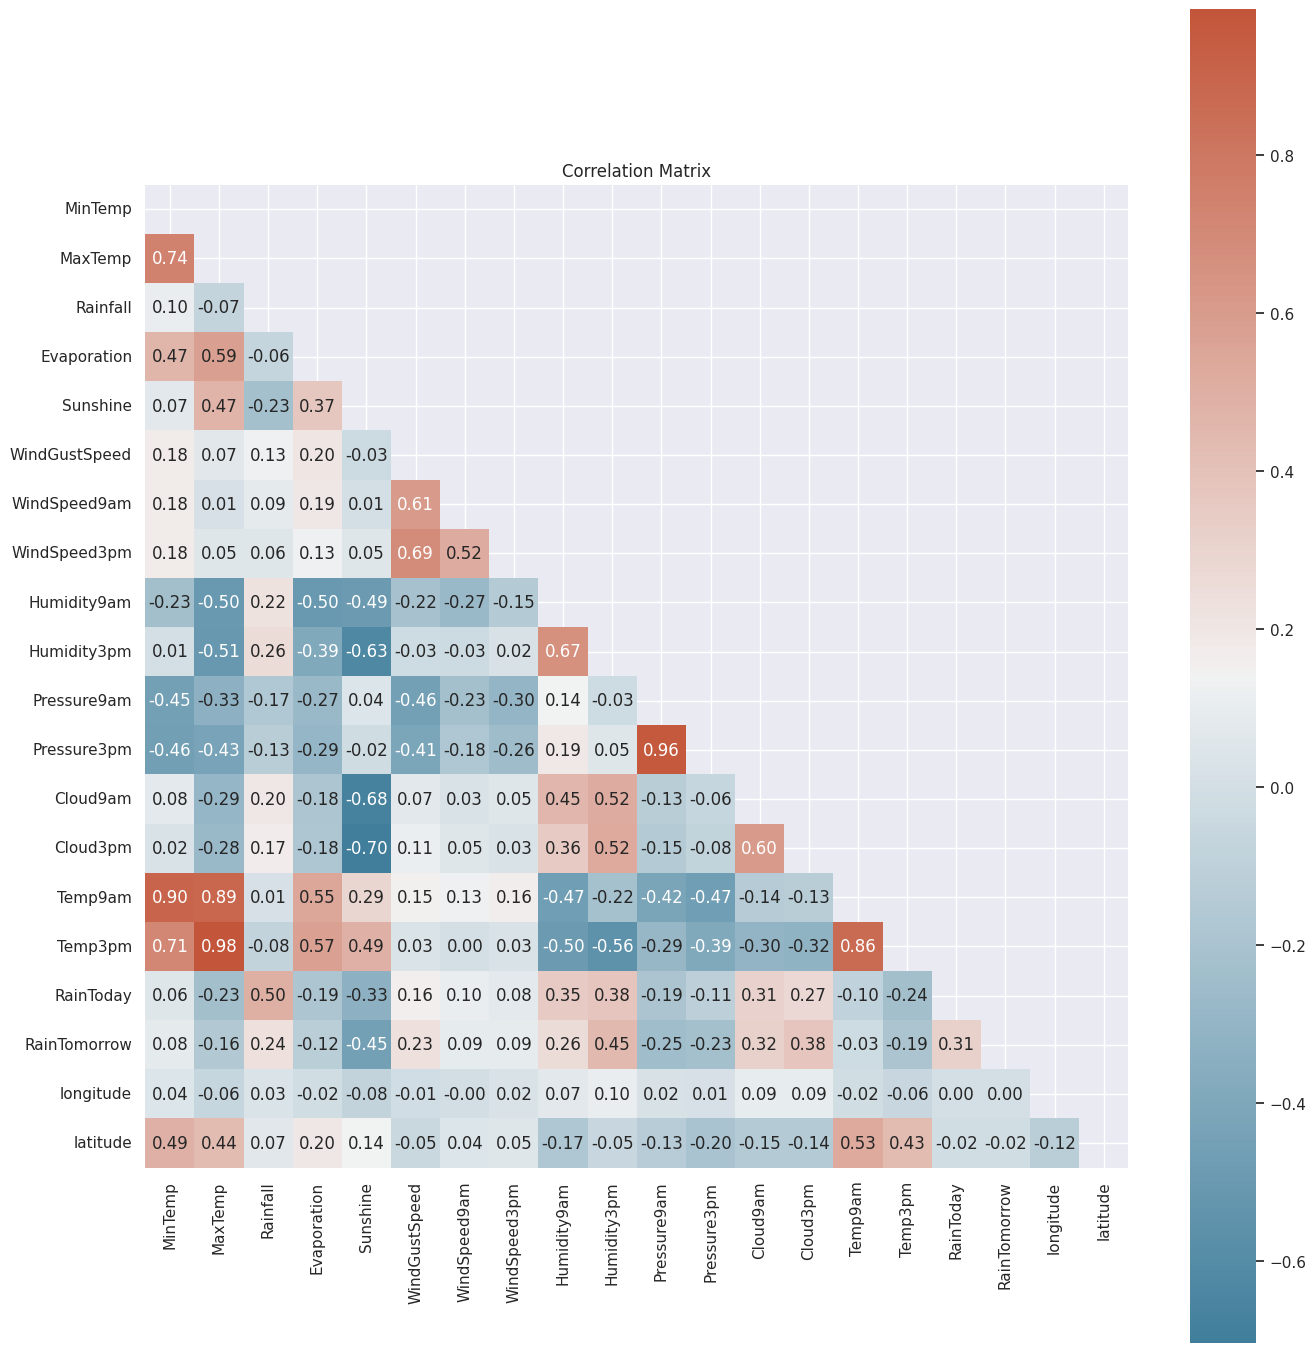

In [29]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(data.corr()))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()
plt.savefig('/content/sample_data/corr_heatmap.png', facecolor='white', dpi=100);

**Nhận xét :**


*   Nhìn vào biểu đồ Heatmap, ta thấy biến RainTomorrow có tương quan đến biến Humidity3pm là cao nhất
*   RainToday có tương quan đến biến Rainfall, Humidity. Trong đó, Rainfall cao nhất



In [30]:
# hàm tạo thuộc tính
def create_features(df):
    df = df.copy()
    # df['quarter'] = df.Date.dt.quarter
    df['month'] = df.Date.dt.month
    df['year'] = df.Date.dt.year
    return df

#hàm tạo dataframe theo từng vùng lưu trữ dưới dạng dictionary
def create_df_dictionary(df, group_column):
    df_by_location = {}
    grouped_df = df.groupby(group_column)

    for location, location_df in grouped_df:
        df_by_location[location] = location_df

    return df_by_location

#hàm đếm số dòn null cảu dataframe theo vùng
def create_null_counts_df(df_by_location):
    null_counts = {}

    for location, location_df in df_by_location.items():
        null_counts[location] = location_df.isna().sum()

    null_counts_df = pd.DataFrame(null_counts)

    return null_counts_df

#hàm tính số phần trăm bị null
def create_null_counts_percentage_df(df_by_location):
    null_counts = {}

    for location, location_df in df_by_location.items():
        null_counts[location] = 100 * location_df.isna().sum() / len(location_df)

    null_counts_df = pd.DataFrame(null_counts)

    return null_counts_df

df = create_features(df)


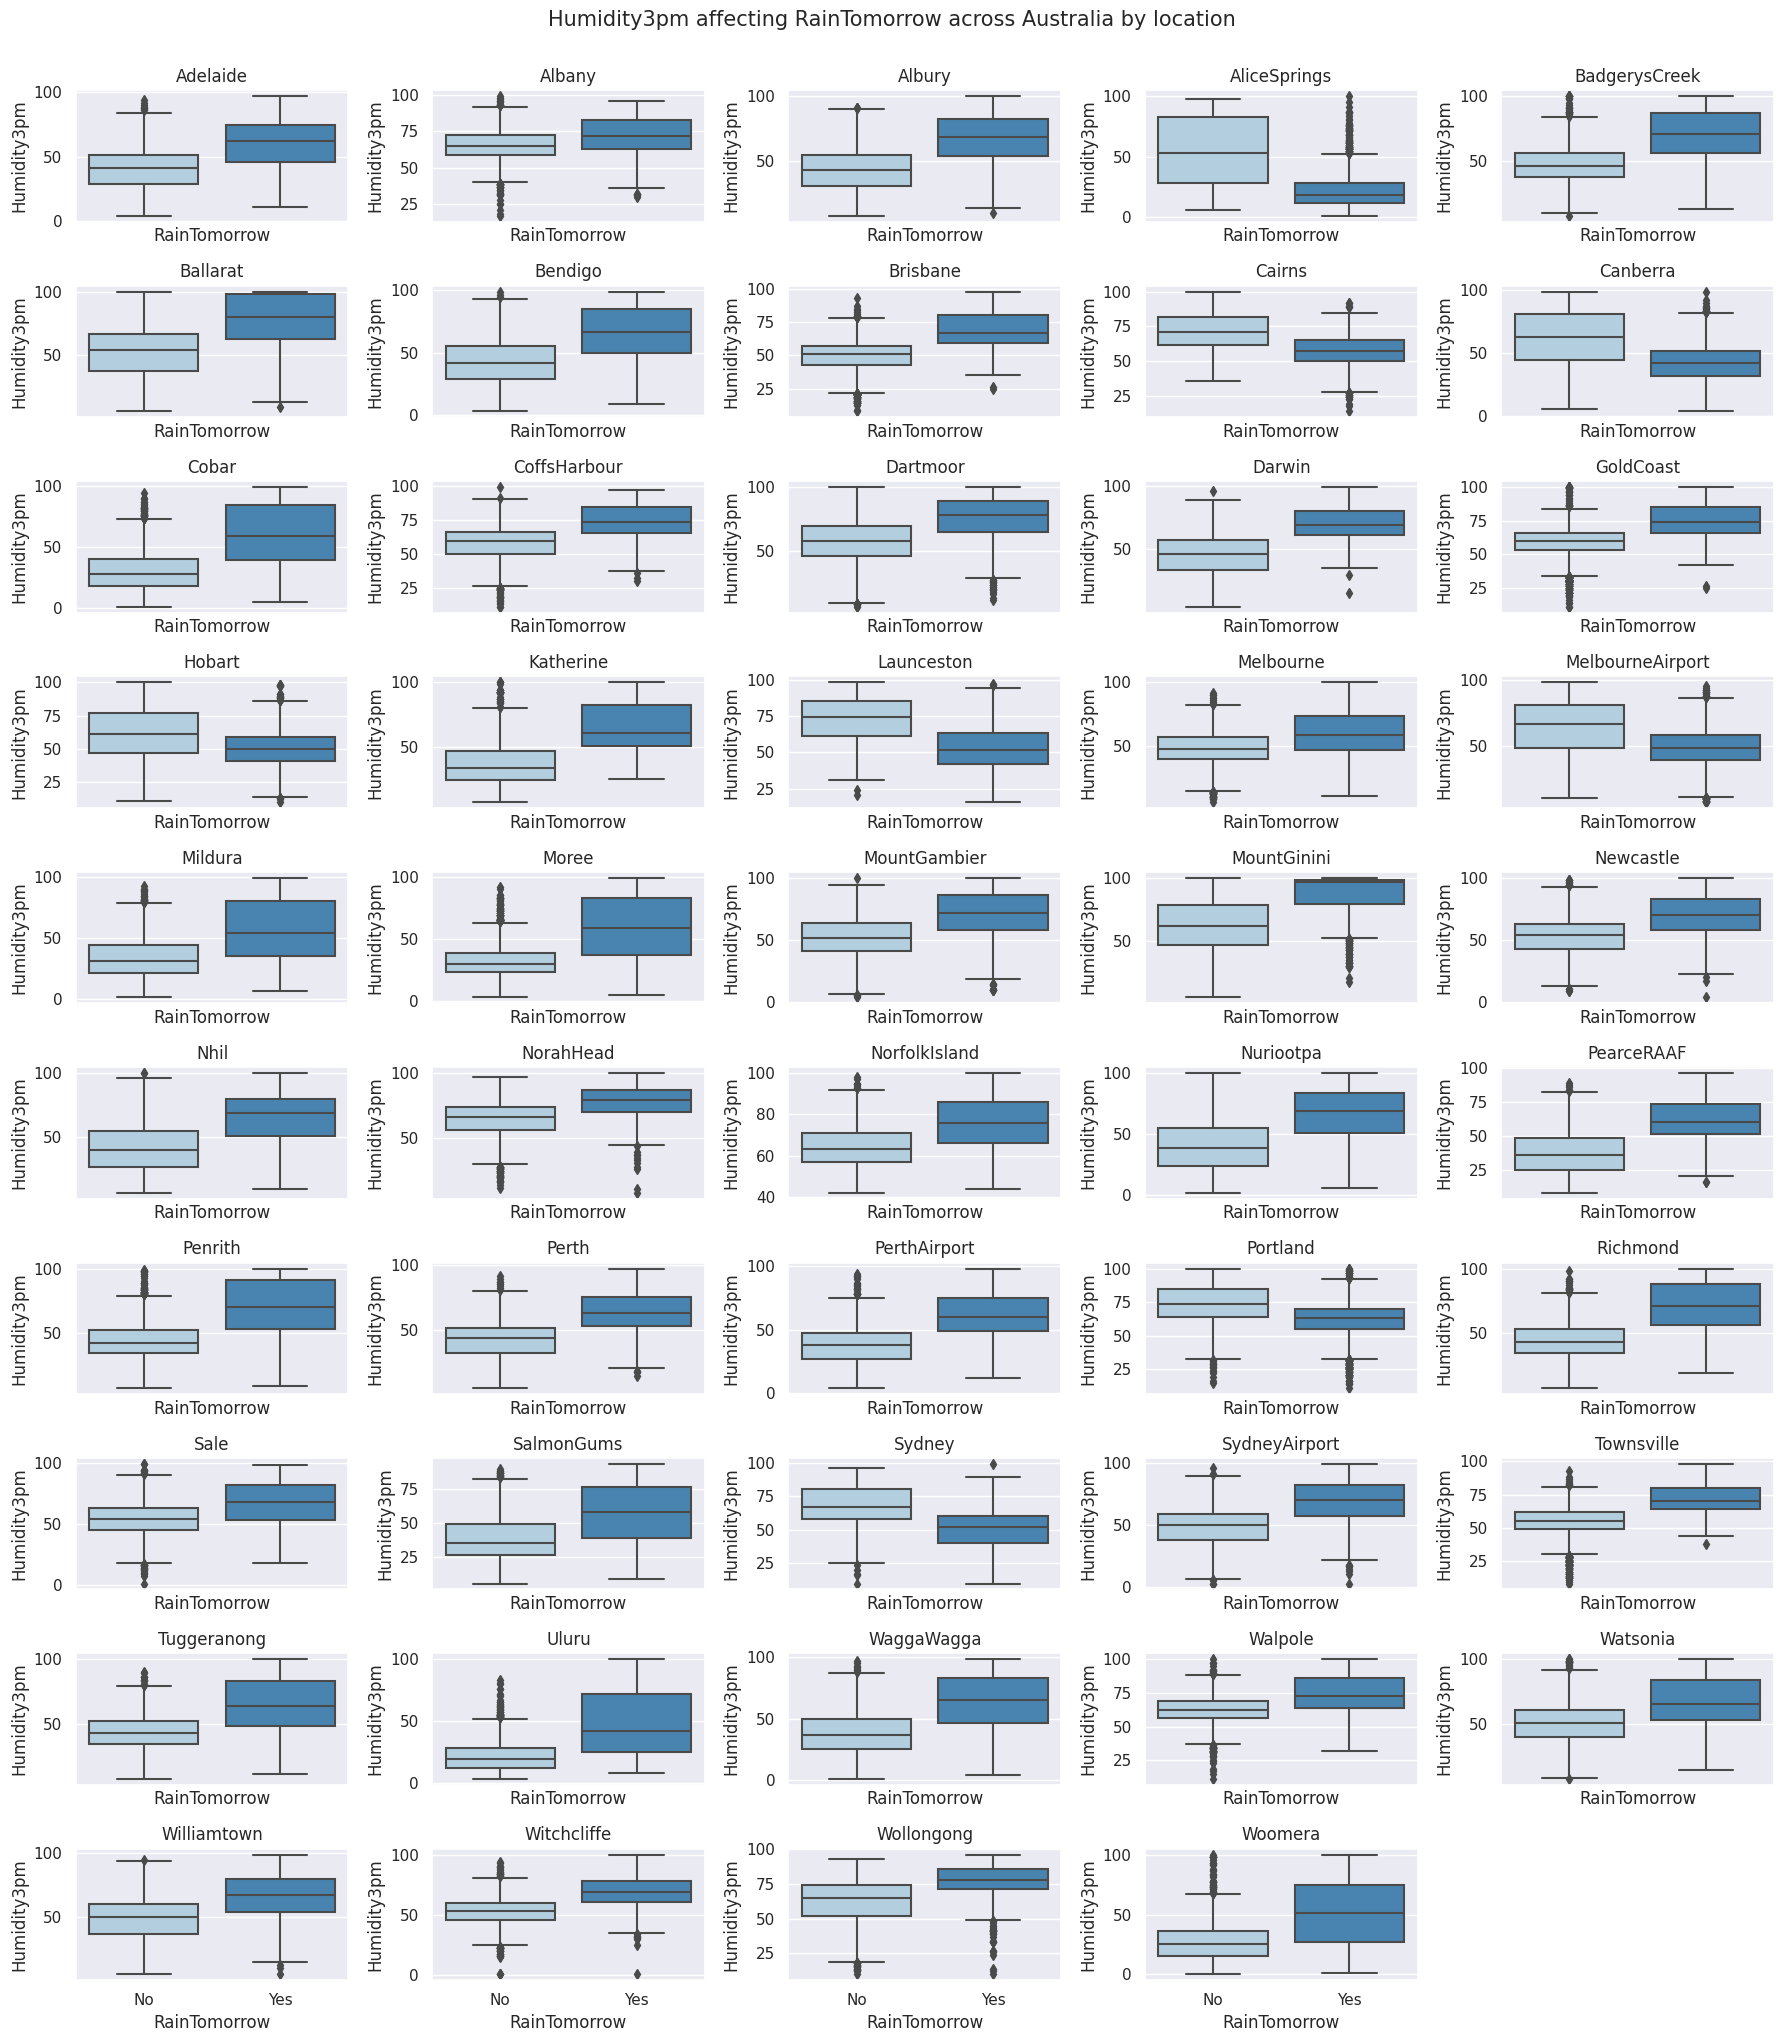

In [31]:
# Let us see how humidity at 3pm affects rain tomorrow.
#
import warnings
locations = sorted(df['Location'].unique())
fig, axes = plt.subplots(10,5, figsize = (18,20), sharex=True, sharey=False)
axes_ = axes.flat
#Remove last 1 blank axes from the figure.
for i in [-1]:
    fig.delaxes(axes_[i])

feature_name = 'Humidity3pm'   # Our feature has to be numeric
# Change this to numeric feature of your choice that you want to examine

with warnings.catch_warnings():  # ignore the Numpy nan warnings.
    warnings.simplefilter("ignore")
    for i, location in enumerate(locations):
        sns.boxplot(data = df[df.Location == location], x = 'RainTomorrow', y = feature_name, hue_order=['No','Yes'],palette = 'Blues', ax=axes_[i])
        axes_[i].set_title(location)
    plt.tight_layout()
plt.suptitle(f"{feature_name} affecting RainTomorrow across Australia by location", fontsize=15, y=1.02);

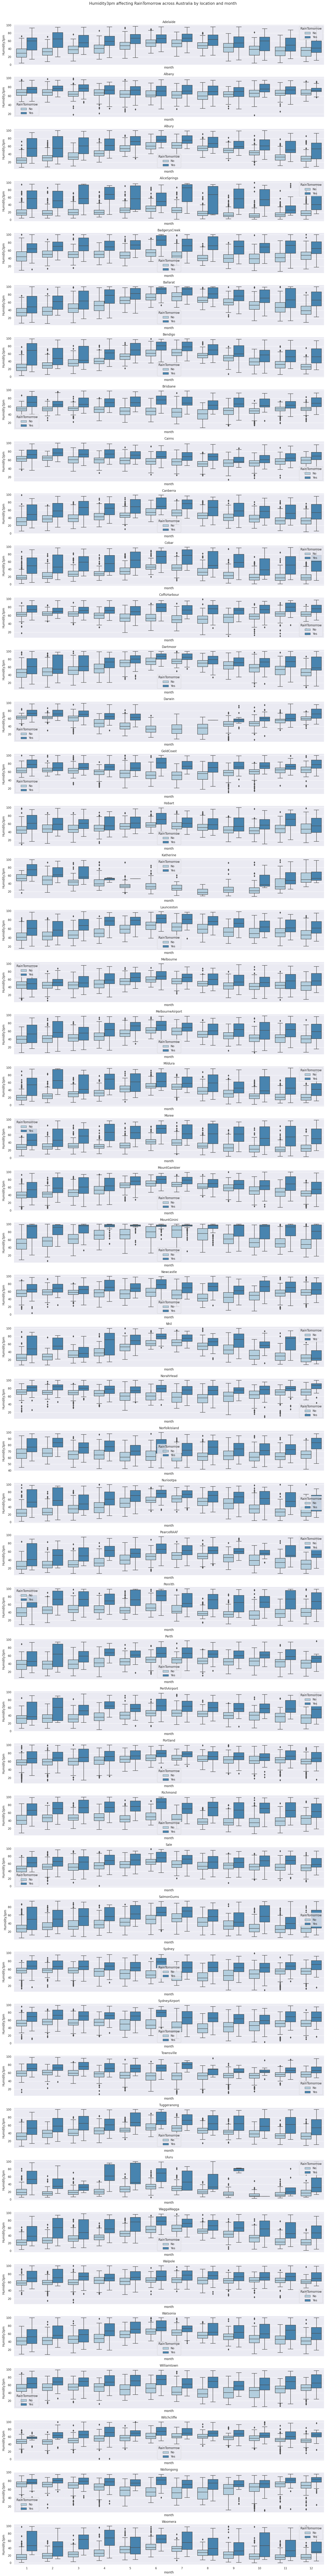

In [32]:
# Let us see how humidity at 3pm affects rain tomorrow.
#
fig, axes = plt.subplots(49,1, figsize = (18,140), sharex=True, sharey=False)
axes_ = axes.flat

feature_name = 'Humidity3pm'   # Our feature has to be numeric
# Change this to numeric feature of your choice that you want to examine

with warnings.catch_warnings():  # ignore the Numpy nan warnings.
    warnings.simplefilter("ignore")
    for i, location in enumerate(locations[:]):
        sns.boxplot(data = df[df.Location == location], hue = 'RainTomorrow', x = 'month', y = feature_name, hue_order=['No','Yes'], palette = 'Blues', ax=axes_[i])
        axes_[i].set_title(location)
    plt.tight_layout()
plt.suptitle(f"{feature_name} affecting RainTomorrow across Australia by location and month", fontsize=15, y=1.006);

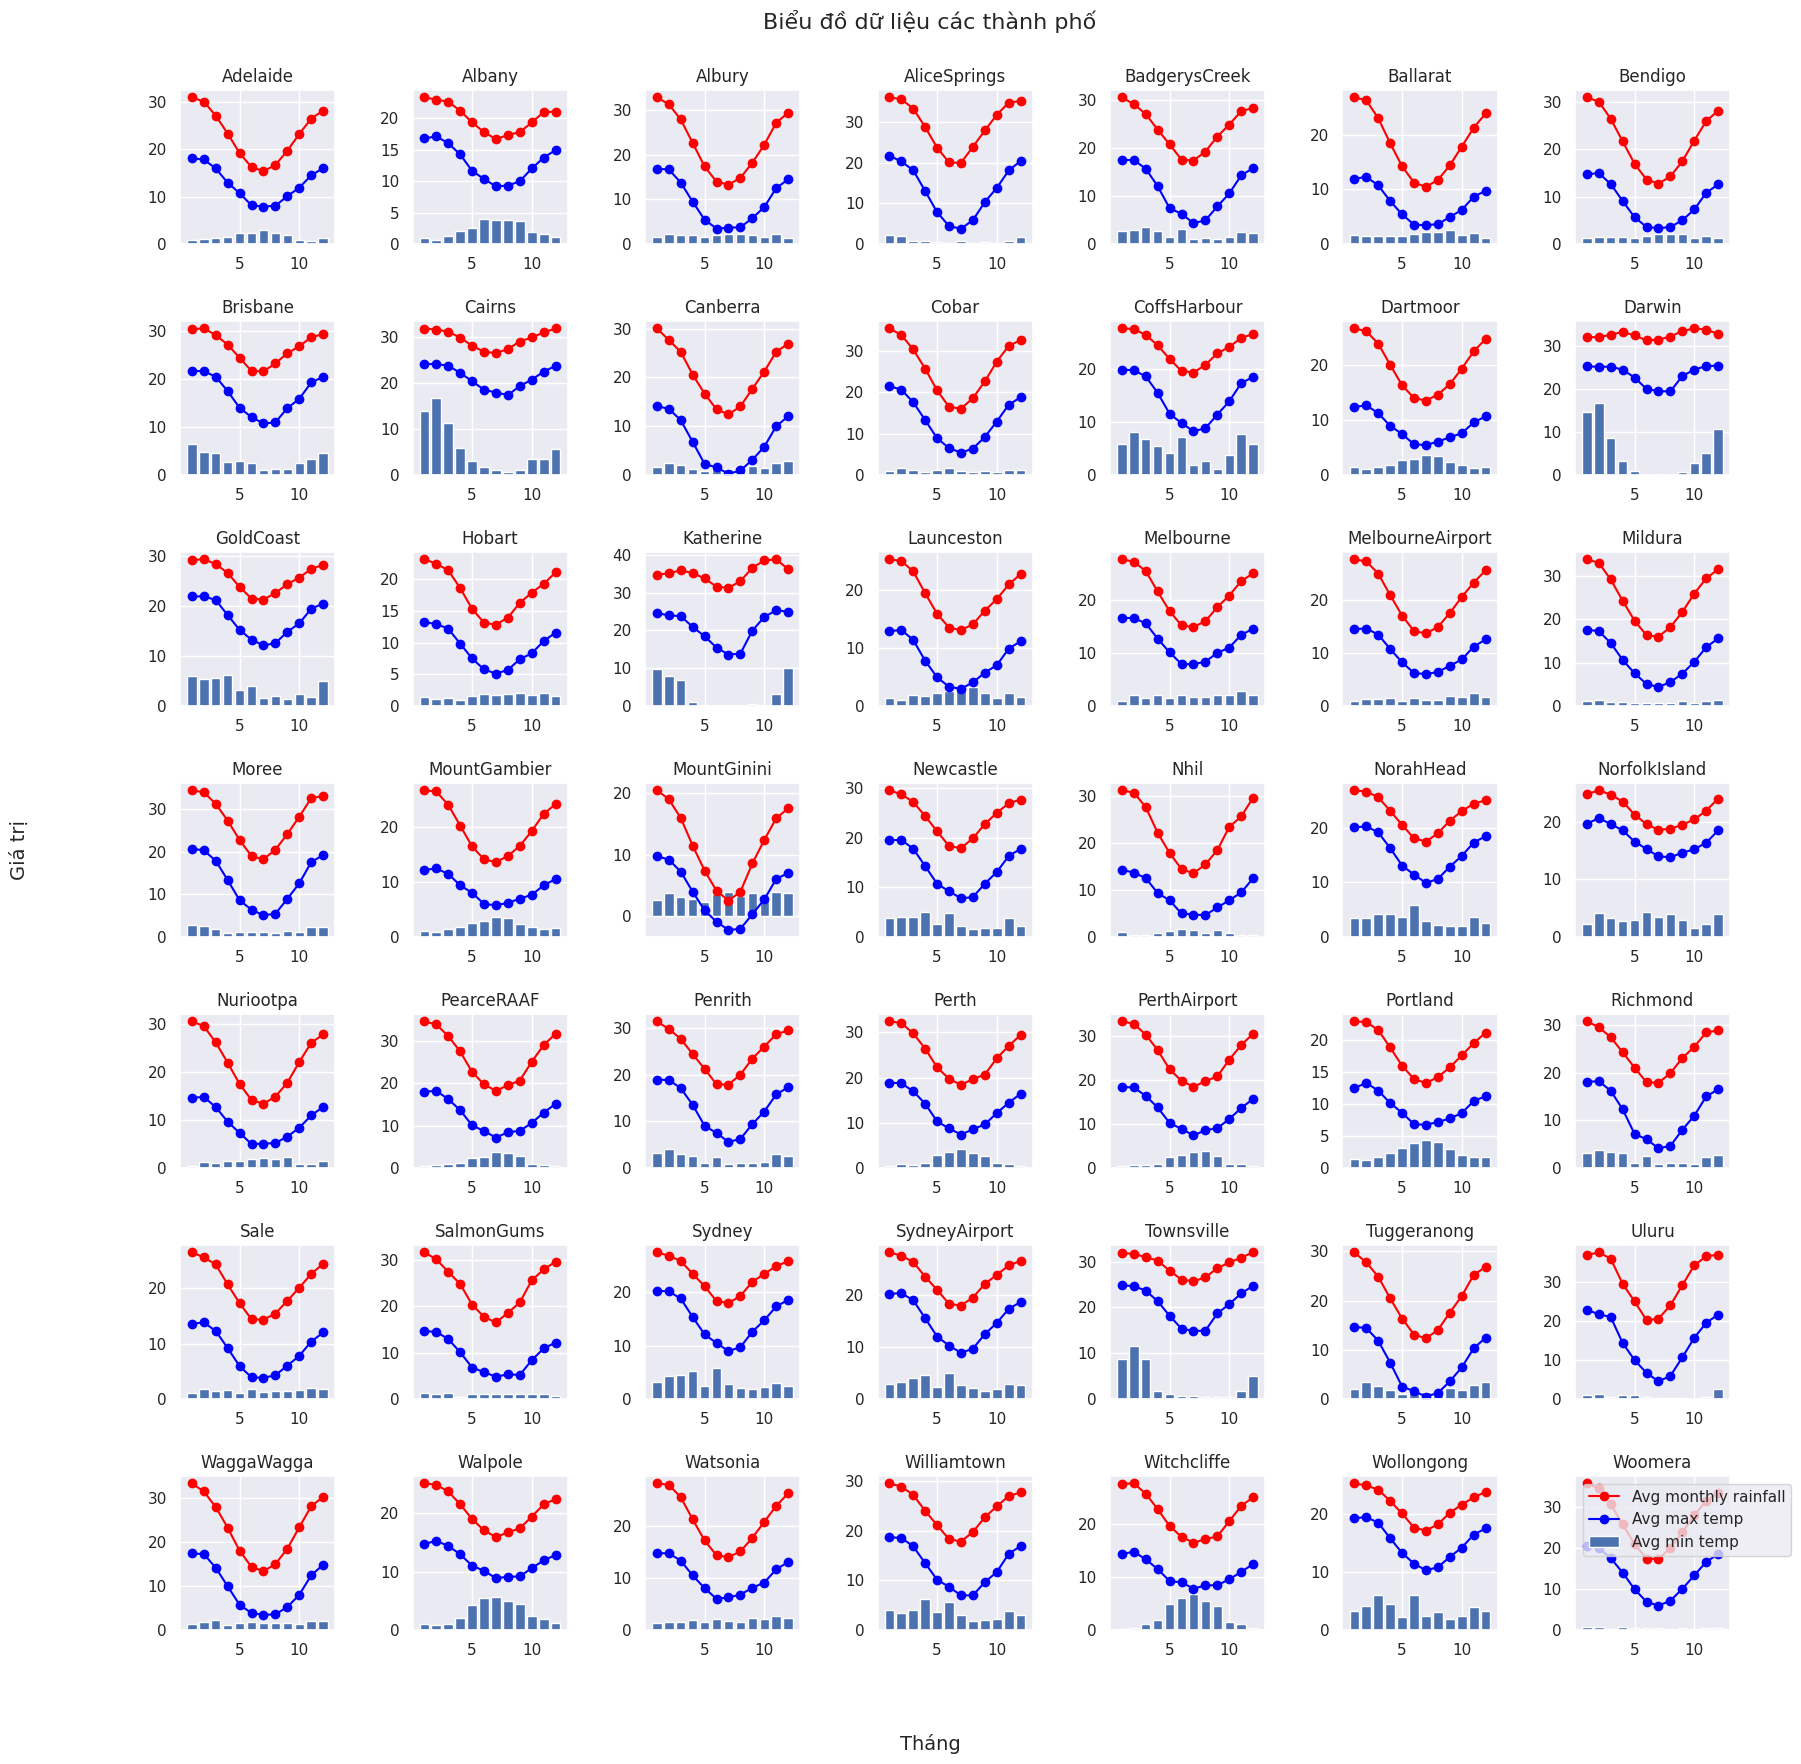

In [33]:
data = create_features(df)

# Đầu tiên, lọc danh sách các thành phố duy nhất
cities = sorted(data["Location"].unique())

# Tạo một biểu đồ với 7x7 ô
fig, axs = plt.subplots(7, 7, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, city in enumerate(cities):
    # Lọc dữ liệu cho từng thành phố
    city_data = data[data['Location'] == city]

    # Tính trung bình các giá trị theo tháng
    rainfall = city_data.groupby("month")["Rainfall"].mean()
    max_temp = city_data.groupby("month")["MaxTemp"].mean()
    min_temp = city_data.groupby("month")["MinTemp"].mean()
    months = list(range(1, 13))

    # Xác định vị trí của ô trong biểu đồ 7x7
    row = i // 7
    col = i % 7

    # Vẽ biểu đồ cho từng thành phố
    axs[row, col].bar(months, rainfall, label="Avg monthly rainfall", color='b')
    axs[row, col].plot(months, max_temp, 'o-', color="red", label="Avg max temp")
    axs[row, col].plot(months, min_temp, 'o-', color="blue", label="Avg min temp")

    axs[row, col].set_title(city)


fig.text(0.5, 0.05, 'Tháng', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Giá trị', va='center', rotation='vertical', fontsize=14)

plt.suptitle("Biểu đồ dữ liệu các thành phố", fontsize=16, y=0.92)
plt.legend(['Avg monthly rainfall', 'Avg max temp', 'Avg min temp'], loc='upper left')
# Đảm bảo không hiển thị ô trống
for i in range(len(cities), 7 * 7):
    row = i // 7
    col = i % 7
    fig.delaxes(axs[row, col])

plt.show()



In [34]:
def get_quy(month):
    if month in [12, 1, 2]:
        return 1 #mùa hè
    elif month in [3, 4, 5]:
        return 2 # mùa thu
    elif month in [6, 7, 8]:
        return 3 # mùa đông
    elif month in [9, 10, 11]:
        return 4 # mùa xuân

data['quarter'] = data['month'].apply(get_quy)

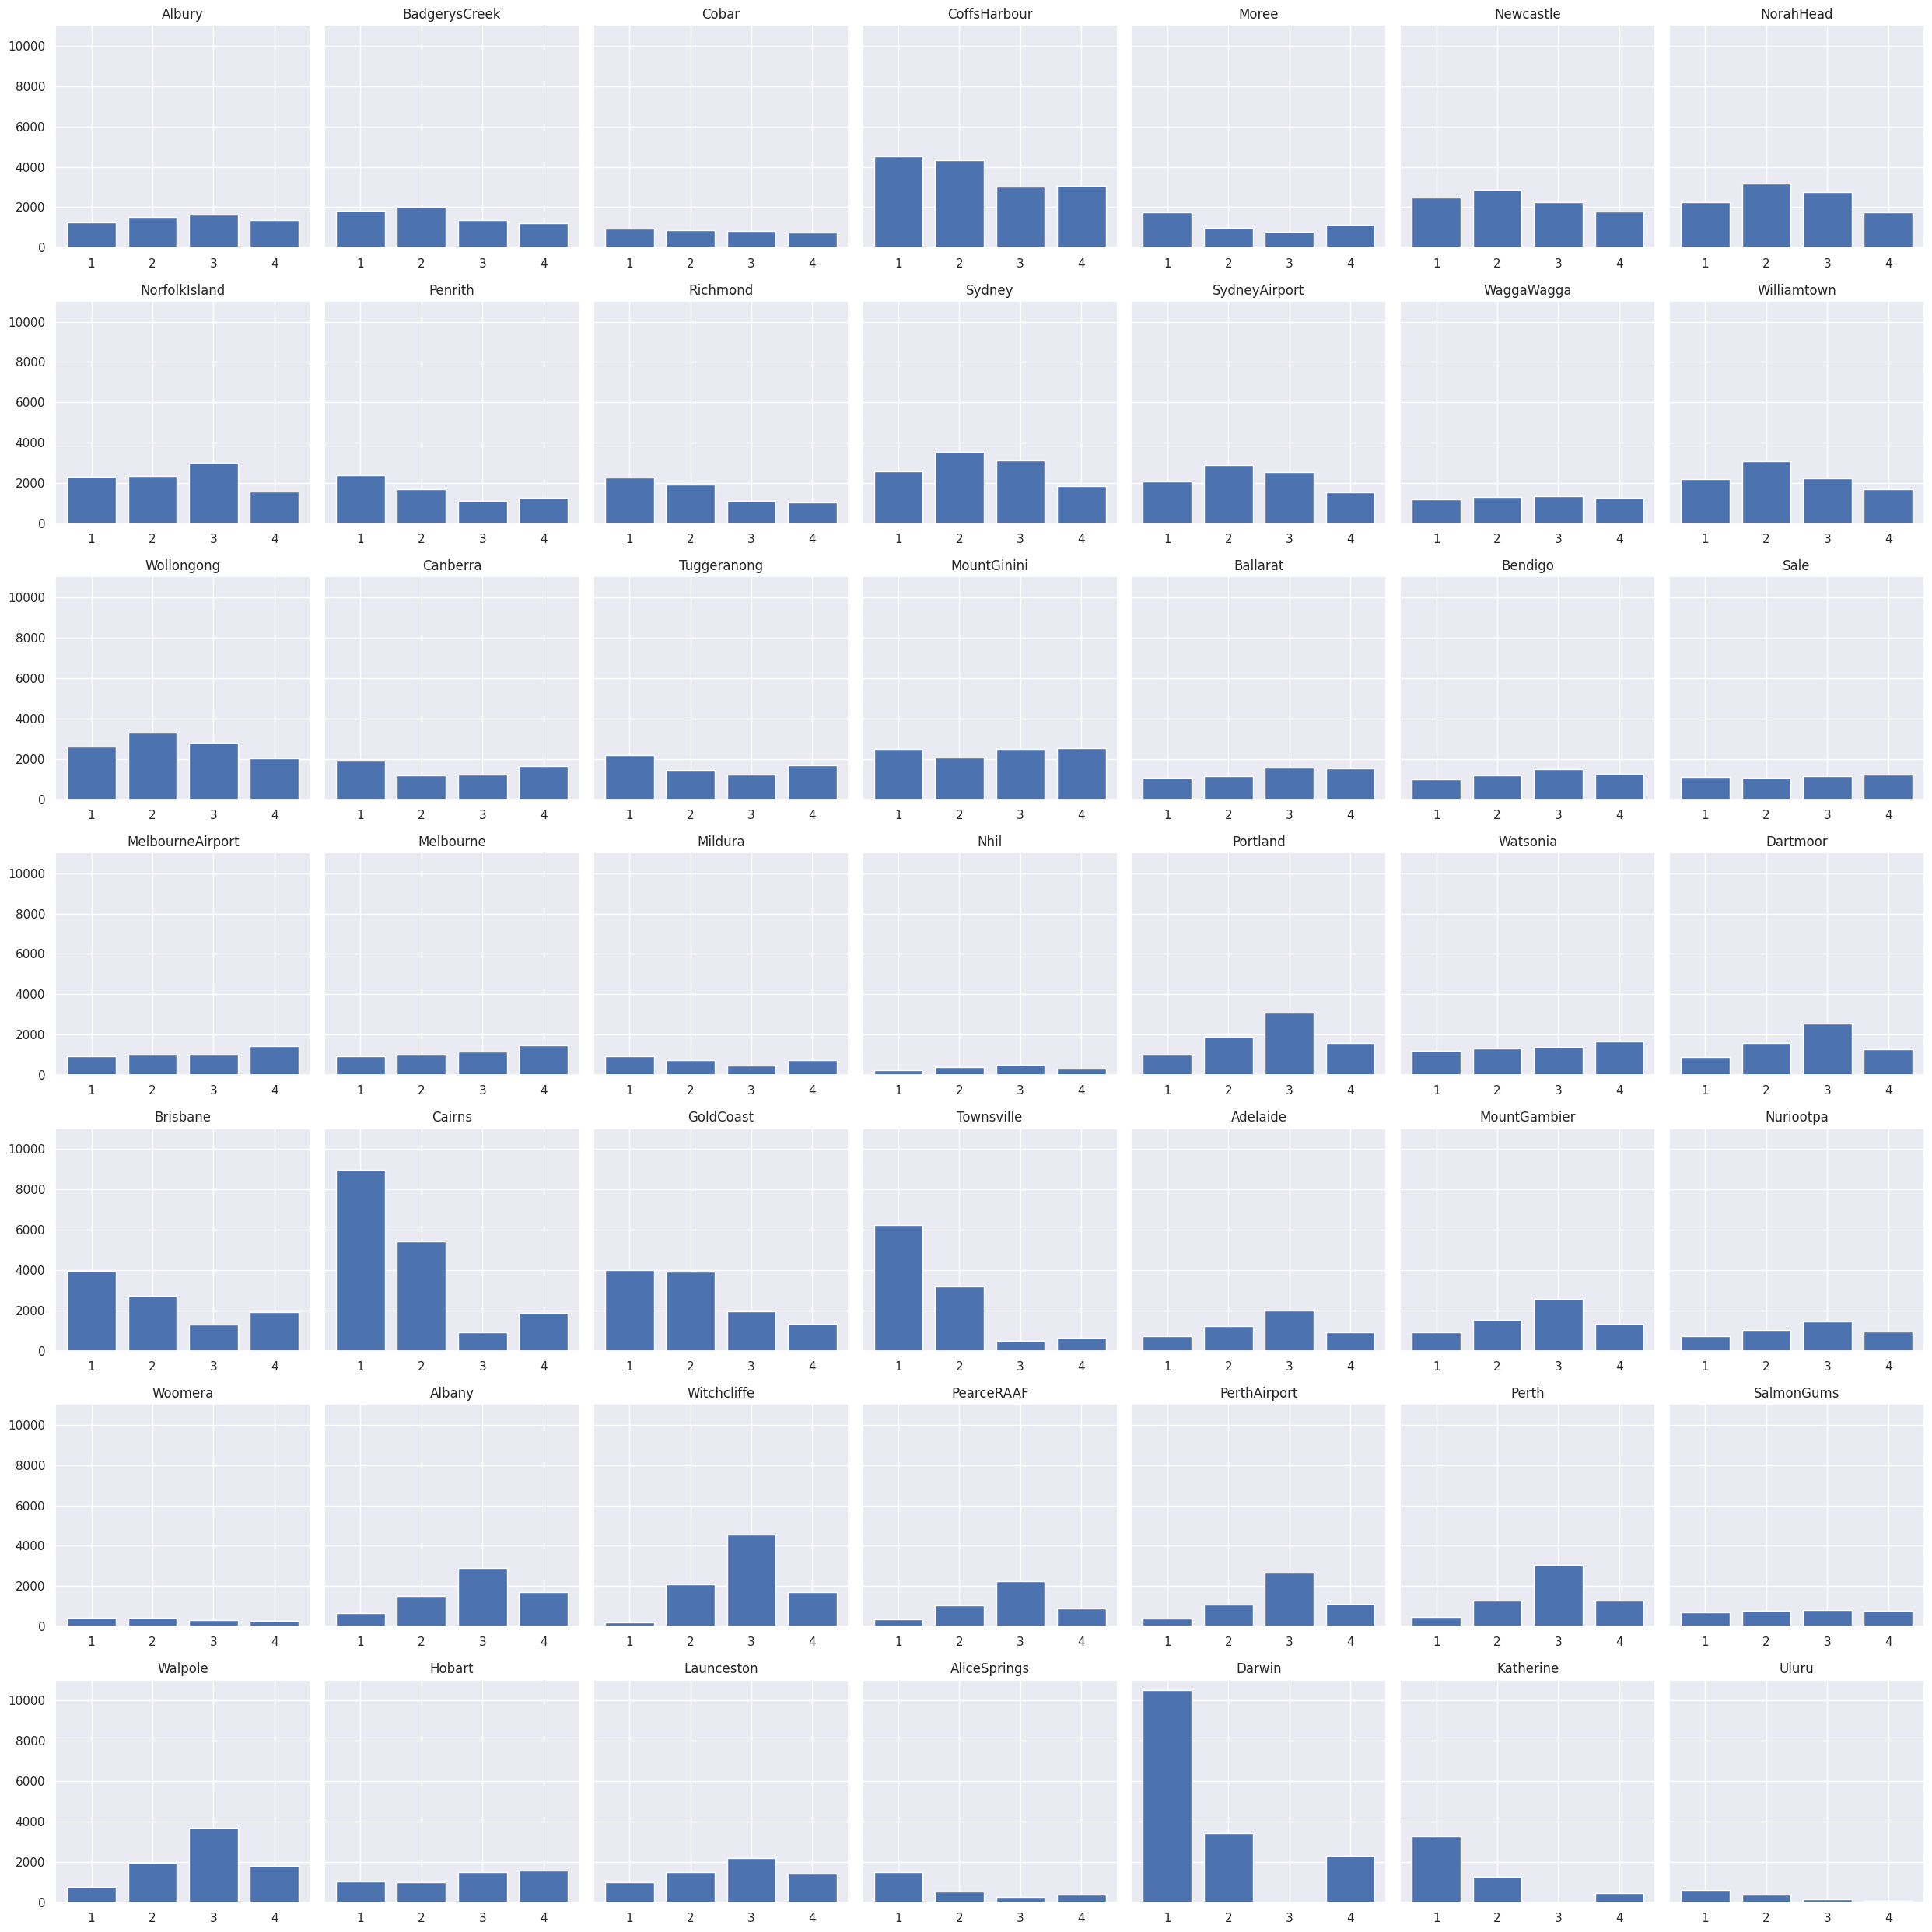

In [35]:
# Tạo danh sách 49 địa điểm trên nước Úc
locations = data['Location'].unique()[:49]


# Tạo biểu đồ lượng mưa theo quý cho từng địa điểm
fig, ax = plt.subplots(7, 7, figsize=(25, 25), sharey=True, tight_layout=True)
ax_flat = ax.flatten()

for i, location in enumerate(locations):
    mua_theo_quy = data[data['Location'] == location].groupby('quarter')['Rainfall'].sum()
    quy = mua_theo_quy.index
    luong_mua = mua_theo_quy.values
    ax_flat[i].bar(quy, luong_mua)  # Sửa đổi ở đây
    ax_flat[i].set_title(location)

plt.show()

# **DATA PREPROCESSING**

In [36]:
df_by_location = create_df_dictionary(df, 'Location')
df = create_features(df)
null_counts_df = create_null_counts_df(df_by_location)
null_counts_percentage_df = create_null_counts_percentage_df(df_by_location)

In [37]:
row_counts = {}

# Lặp qua từng cặp key-value trong từ điển df_by_location
for location, location_df in df_by_location.items():
    # Đếm số lượng hàng trong mỗi dataframe
    row_counts[location] = location_df.shape[0]

# Tạo dataframe từ từ điển row_counts
row_counts_df = pd.DataFrame({'Location': list(row_counts.keys()), 'Row Count': list(row_counts.values())})
row_counts_df

Location  Row Count
0           Adelaide       3193
1             Albany       3040
2             Albury       3040
3       AliceSprings       3040
4      BadgerysCreek       3009
5           Ballarat       3040
6            Bendigo       3040
7           Brisbane       3193
8             Cairns       3040
9           Canberra       3436
10             Cobar       3009
11      CoffsHarbour       3009
12          Dartmoor       3009
13            Darwin       3193
14         GoldCoast       3040
15            Hobart       3193
16         Katherine       1578
17        Launceston       3040
18         Melbourne       3193
19  MelbourneAirport       3009
20           Mildura       3009
21             Moree       3009
22      MountGambier       3040
23       MountGinini       3040
24         Newcastle       3039
25              Nhil       1578
26         NorahHead       3004
27     NorfolkIsland       3009
28         Nuriootpa       3009
29        PearceRAAF       3009
30           Penrith       3039
31             Perth       3193
32      PerthAirport       3009
33          Portland       3009
34          Richmond       3009
35              Sale       3009
36        SalmonGums       3001
37            Sydney       3344
38     SydneyAirport       3009
39        Townsville       3040
40       Tuggeranong       3039
41             Uluru       1578
42        WaggaWagga       3009
43           Walpole       3006
44          Watsonia       3009
45       Williamtown       3009
46       Witchcliffe       3009
47        Wollongong       3040
48           Woomera       3009

In [38]:
null_counts_percentage_df

Adelaide      Albany      Albury  AliceSprings  \
Date             0.000000    0.000000    0.000000      0.000000   
Location         0.000000    0.000000    0.000000      0.000000   
MinTemp          0.062637    2.072368    0.361842      0.032895   
MaxTemp          0.093956    1.776316    0.361842      0.065789   
Rainfall         3.194488    0.789474    0.953947      0.263158   
Evaporation     46.633260    9.539474  100.000000      7.072368   
Sunshine        44.597557   17.105263  100.000000     17.105263   
WindGustDir      0.814281  100.000000    1.052632      1.677632   
WindGustSpeed    0.814281  100.000000    1.052632      1.677632   
WindDir9am       8.581272    8.125000   17.269737      7.565789   
WindDir3pm       0.501096   25.756579    1.513158      0.131579   
WindSpeed9am     0.156593    2.006579    0.296053      0.065789   
WindSpeed3pm     0.156593   24.111842    0.361842      0.065789   
Humidity9am      0.156593    1.611842    0.296053      0.098684   
Humidity3pm      0.156593   23.552632    0.263158      0.164474   
Pressure9am      0.250548    0.822368    0.164474      0.032895   
Pressure3pm      0.219230    0.822368    0.263158      0.098684   
Cloud9am       100.000000    1.250000   57.598684     10.986842   
Cloud3pm       100.000000   23.388158   53.059211     11.875000   
Temp9am          0.156593    1.282895    0.296053      0.000000   
Temp3pm          0.125274   23.421053    0.263158      0.065789   
RainToday        3.194488    0.789474    0.953947      0.263158   
RainTomorrow     3.225806    0.789474    0.953947      0.296053   
month            0.000000    0.000000    0.000000      0.000000   
year             0.000000    0.000000    0.000000      0.000000   

               BadgerysCreek    Ballarat     Bendigo  Brisbane     Cairns  \
Date                0.000000    0.000000    0.000000  0.000000   0.000000   
Location            0.000000    0.000000    0.000000  0.000000   0.000000   
MinTemp             1.196411    0.032895    0.065789  0.281867   0.032895   
MaxTemp             0.963775    0.032895    0.164474  0.438459   0.000000   
Rainfall            2.691924    0.394737    0.197368  1.002192   1.710526   
Evaporation       100.000000  100.000000   61.019737  0.595052  12.171053   
Sunshine          100.000000  100.000000  100.000000  1.534607  15.657895   
WindGustDir         2.525756    1.019737    1.348684  1.284059   0.625000   
WindGustSpeed       2.525756    1.019737    1.315789  1.284059   0.592105   
WindDir9am         14.456630    2.993421    8.026316  2.192296   1.414474   
WindDir3pm          2.824859    0.592105    1.414474  1.064829   0.131579   
WindSpeed9am        1.628448    0.263158    0.131579  0.031319   0.032895   
WindSpeed3pm        1.595214    0.131579    0.131579  0.250548   0.032895   
Humidity9am         1.794616    0.690789    0.230263  0.125274   0.032895   
Humidity3pm         1.827850    0.230263    0.065789  0.469778   0.000000   
Pressure9am         5.583250    0.789474    0.493421  0.031319   0.032895   
Pressure3pm         5.749418    0.855263    0.328947  0.250548   0.000000   
Cloud9am          100.000000   17.960526   31.842105  0.031319   6.809211   
Cloud3pm          100.000000   34.473684   25.394737  0.062637   7.565789   
Temp9am             1.362579    0.394737    0.098684  0.125274   0.032895   
Temp3pm             1.462280    0.197368    0.065789  0.469778   0.000000   
RainToday           2.691924    0.394737    0.197368  1.002192   1.710526   
RainTomorrow        2.691924    0.394737    0.197368  1.002192   1.710526   
month               0.000000    0.000000    0.000000  0.000000   0.000000   
year                0.000000    0.000000    0.000000  0.000000   0.000000   

                Canberra  ...  Townsville  Tuggeranong       Uluru  \
Date            0.000000  ...    0.000000     0.000000    0.000000   
Location        0.000000  ...    0.000000     0.000000    0.000000   
MinTemp         0.174622  ...    0.065789     0.032906    2.2

**Nhận xét :**

*   Từ bảng trên, quyết định xóa những thuộc tính bị null quá nhiều không thể xử lý được Evaporation, Sunshine, Cloud9am, Cloud3pm




In [39]:
df.drop(columns=['Cloud9am','Cloud3pm','Sunshine','Evaporation'], inplace=True)
df_by_location = create_df_dictionary(df, 'Location')

In [40]:
df.shape

(145460, 21)

## **HANDING MISSING VALUE NUMERICAL**

In [41]:
#null numerical columns
numerical_null = [var for var in df.columns if df[var].dtype !='O' and df[var].isnull().sum() != 0]
numerical_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [42]:
for location, location_df in df_by_location.items():
    for col in numerical_null:
        # Đếm các giá trị của từng cột theo tháng và năm
        counts_per_month = location_df.groupby(['year', 'month', col]).size().reset_index(name='Counts')
        # Đổi tên cột để tránh trùng lặp
        counts_per_month = counts_per_month.rename(columns={col: f'{col}Count'})
        # Sắp xếp lại và chọn ra giá trị xuất hiện nhiều nhất theo từng tháng và năm
        most_common_col_per_month = counts_per_month.sort_values(by=['year', 'month', 'Counts'], ascending=[True, True, False]).groupby(['year', 'month']).first().reset_index()
        # Ghép dataframe và cột giá trị xuất hiện nhiều nhất dựa trên tháng và năm
        location_df = location_df.merge(most_common_col_per_month[['year', 'month', f'{col}Count']], on=['year', 'month'], how='left')
        # Fill NaN
        location_df[col] = location_df[col].fillna(location_df[f'{col}Count'])
        # Xóa đi cột giá trị xuất hiện nhiều nhất theo từng tháng và năm sau khi đã sử dụng
        location_df = location_df.drop(f'{col}Count', axis=1)
        # Lưu lại dataframe
        df_by_location[location] = location_df

## **HANDING MISSING VALUE CATEGORICAL**

In [43]:
categorical_null = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for location, location_df in df_by_location.items():
    for col in categorical_null:
        # Đếm các giá trị của từng cột theo tháng và năm
        counts_per_month = location_df.groupby(['year', 'month', col]).size().reset_index(name='Counts')
        # Đổi tên cột để tránh trùng lặp
        counts_per_month = counts_per_month.rename(columns={col: f'{col}Count'})
        # Sắp xếp lại và chọn ra giá trị xuất hiện nhiều nhất theo từng tháng và năm
        most_common_col_per_month = counts_per_month.sort_values(by=['year', 'month', 'Counts'], ascending=[True, True, False]).groupby(['year', 'month']).first().reset_index()
        # Ghép dataframe và cột giá trị xuất hiện nhiều nhất dựa trên tháng và năm
        location_df = location_df.merge(most_common_col_per_month[['year', 'month', f'{col}Count']], on=['year', 'month'], how='left')
        # Fill NaN
        location_df[col] = location_df[col].fillna(location_df[f'{col}Count'])
        # Xóa đi cột giá trị xuất hiện nhiều nhất theo từng tháng và năm sau khi đã sử dụng
        location_df = location_df.drop(f'{col}Count', axis=1)
        # Lưu lại dataframe
        df_by_location[location] = location_df

In [44]:
for location, location_df in df_by_location.items():
    location_df['RainToday'] = location_df['RainToday'].fillna('Yes')
    df_by_location[location] = location_df

In [45]:
null_counts_percentage_df1 = create_null_counts_percentage_df(df_by_location)
null_counts_percentage_df1

Adelaide      Albany    Albury  AliceSprings  BadgerysCreek  \
Date           0.000000    0.000000  0.000000      0.000000       0.000000   
Location       0.000000    0.000000  0.000000      0.000000       0.000000   
MinTemp        0.000000    0.000000  0.000000      0.000000       0.000000   
MaxTemp        0.000000    0.000000  0.000000      0.000000       0.000000   
Rainfall       0.000000    0.000000  0.000000      0.000000       0.000000   
WindGustDir    0.000000  100.000000  0.000000      0.000000       0.000000   
WindGustSpeed  0.000000  100.000000  0.000000      0.000000       0.000000   
WindDir9am     0.000000    0.000000  0.000000      0.000000       0.000000   
WindDir3pm     0.000000   22.861842  0.000000      0.000000       0.000000   
WindSpeed9am   0.000000    0.000000  0.000000      0.000000       0.000000   
WindSpeed3pm   0.000000   22.861842  0.000000      0.000000       0.000000   
Humidity9am    0.000000    0.000000  0.000000      0.000000       0.000000   
Humidity3pm    0.000000   22.861842  0.000000      0.000000       0.000000   
Pressure9am    0.000000    0.000000  0.000000      0.000000       3.057494   
Pressure3pm    0.000000    0.000000  0.000000      0.000000       3.057494   
Temp9am        0.000000    0.000000  0.000000      0.000000       0.000000   
Temp3pm        0.000000   22.861842  0.000000      0.000000       0.000000   
RainToday      0.000000    0.000000  0.000000      0.000000       0.000000   
RainTomorrow   3.225806    0.789474  0.953947      0.296053       2.691924   
month          0.000000    0.000000  0.000000      0.000000       0.000000   
year           0.000000    0.000000  0.000000      0.000000       0.000000   

               Ballarat   Bendigo  Brisbane    Cairns  Canberra  ...  \
Date           0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Location       0.000000  0.000000  0.000000  0.000000  0.000000  ...   
MinTemp        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
MaxTemp        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Rainfall       0.000000  0.000000  0.000000  0.000000  0.000000  ...   
WindGustDir    0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindGustSpeed  0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindDir9am     0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindDir3pm     0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindSpeed9am   0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindSpeed3pm   0.000000  0.000000  0.000000  0.000000  6.169965  ...   
Humidity9am    0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Humidity3pm    0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Pressure9am    0.000000  0.000000  0.000000  0.000000  6.169965  ...   
Pressure3pm    0.000000  0.000000  0.000000  0.000000  6.169965  ...   
Temp9am        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Temp3pm        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
RainToday      0.000000  0.000000  0.000000  0.000000  0.000000  ...   
RainTomorrow   0.394737  0.197368  1.002192  1.710526  0.523865  ...   
month          0.000000  0.000000  0.000000  0.000000  0.000000  ...   
year           0.000000  0.000000  0.000000  0.000000  0.000000  ...   

               Townsville  Tuggeranong     Uluru  WaggaWagga   Walpole  \
Date             0.000000     0.000000  0.000000     0.00000  0.000000   
Location         0.000000     0.000000  0.000000     0.00000  0.000000   
MinTemp          0.000000     0.000000  0.000000     0.00000  0.000000   
MaxTemp          0.000000     0.000000  0.000000     0.00000  0.000000   
Rainfall         0.000000     0.000000  0.000000     0.00000  2.029275   
WindGustDir      0.000000     0.000000  0.000000     0.00000  0.000000   
WindGustSpeed    0.000000     0.000000  0.000000     0.00000  0.000000   
WindDir9am       0.000000     0.000000  0.000000     0.00000  0.000000   
WindDir3pm       0.000000     0.000000  0.00000

## **HANDING MISSING VALUE**

In [46]:
# Gộp các dataframe nhỏ thành một dataframe duy nhất
df_final = pd.concat(df_by_location.values(), ignore_index=True)
(df_final.isnull().sum() / df_final.shape[0]) * 100

Date             0.000000
Location         0.000000
MinTemp          0.353362
MaxTemp          0.353362
Rainfall         0.395298
WindGustDir      5.366424
WindGustSpeed    5.366424
WindDir9am       0.396673
WindDir3pm       1.330263
WindSpeed9am     0.396673
WindSpeed3pm     1.330263
Humidity9am      0.648288
Humidity3pm      2.059673
Pressure9am      9.938815
Pressure3pm      9.938815
Temp9am          0.353362
Temp3pm          1.764746
RainToday        0.000000
RainTomorrow     2.245978
month            0.000000
year             0.000000
dtype: float64

In [47]:
df_final['quarter'] = df_final['month'].apply(get_quy)
df_to_fill = df_final.drop(['Date','MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'year'], axis = 1)
df_to_fill.isnull().sum()

Location            0
Rainfall          575
WindGustDir      7806
WindDir9am        577
WindDir3pm       1935
Humidity9am       943
Humidity3pm      2996
Pressure9am     14457
Pressure3pm     14457
RainToday           0
RainTomorrow     3267
month               0
quarter             0
dtype: int64

In [48]:
df_to_fill = df_to_fill.dropna(subset=df_to_fill.columns.difference(['RainTomorrow']))
df_to_fill.isnull().sum()

Location           0
Rainfall           0
WindGustDir        0
WindDir9am         0
WindDir3pm         0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
RainToday          0
RainTomorrow    2253
month              0
quarter            0
dtype: int64

## **HANDING MISSING TARGET VALUE BY DECISIONTREE**

In [49]:
categorical_col = [var for var in df_to_fill.columns if df_to_fill[var].dtype == 'O']
label_encoder = LabelEncoder()
for col in categorical_col:
  df_to_fill[col] = label_encoder.fit_transform(df_to_fill[col])

In [50]:
df_to_fill

Location  Rainfall  WindGustDir  WindDir9am  WindDir3pm  Humidity9am  \
0              0       5.0            7          12          13         92.0   
1              0       0.8           12          11          12         75.0   
2              0       0.0           13           5          12         81.0   
3              0       0.0            5           5           4         71.0   
4              0       0.0            3           5           4         56.0   
...          ...       ...          ...         ...         ...          ...   
145455        43       0.0            1           2           2         52.0   
145456        43       0.0            5           1           6         48.0   
145457        43       0.0            6           3           7         57.0   
145458        43       0.0           13          15          15         61.0   
145459        43       0.0            3           8           8         87.0   

        Humidity3pm  Pressure9am  Pressure3pm  RainToday  RainTomorrow  month  \
0              67.0       1017.4       1017.7          1             0      7   
1              52.0       1022.4       1022.6          0             0      7   
2              56.0       1027.8       1026.5          0             0      7   
3              46.0       1028.7       1025.6          0             0      7   
4              67.0       1023.6       1020.2          0             2      7   
...             ...          ...          ...        ...           ...    ...   
145455         22.0       1027.9       1025.1          0             0      6   
145456         37.0       1025.8       1022.2          0             0      6   
145457         31.0       1021.0       1018.2          0             0      6   
145458         35.0       1019.5       1017.5          0             0      6   
145459         51.0       1022.5       1021.6          0             2      6   

        quarter  
0             3  
1             3  
2             3  
3             3  
4             3  
...         ...  
145455        3  
145456        3  
145457        3  
145458        3  
145459        3  

[125749 rows x 13 columns]

In [51]:
df_train = df_to_fill[df_to_fill['RainTomorrow'] !=2]
df_predict = df_to_fill[df_to_fill['RainTomorrow'] == 2]

In [52]:
df_train['RainTomorrow'].unique()

array([0, 1])

In [53]:
df_predict['RainTomorrow'].unique()

array([2])

In [54]:
df_predict.isnull().sum()

Location        0
Rainfall        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
RainToday       0
RainTomorrow    0
month           0
quarter         0
dtype: int64

In [55]:
#chia tập dữ liệu
X = df_train.drop('RainTomorrow', axis = 1)
y = df_train['RainTomorrow']

# Sử dụng SMOTE để tạo mẫu tổng hợp
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

#split train -test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state = 42)

In [56]:
y_resampled.value_counts()

0    96062
1    48031
Name: RainTomorrow, dtype: int64

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
def evaluate(model, X_test,y_test, y_pred):
    # Classification Report
    print("TEST RESULTS:\n")
    print('-'*53)
    #Report
    print(' Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred)))
    res = cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
    #Độ chính xác trung bình
    print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
    #Độ lệch chuẩn
    print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
    print('\n')

     # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    confusionmatrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.show()
    print('\n')

    # Tính tổng số dự đoán ngày mai mưa (1) và không mưa (0)
    total_samples = confusionmatrix.sum(axis=1)
    # Tính phần trăm cho từng lớp dự đoán
    percentages = (confusionmatrix.T / total_samples).T * 100

    # Vẽ ma trận hỗn hợp với phần trăm sử dụng seaborn
    sns.heatmap(percentages, annot=True, cmap="YlGnBu", fmt='.1f')
    plt.show()

In [58]:
depth_values = list(range(1, 30))
best_d = None
best_f1Score = 0
for depth in depth_values:
    # Tạo mô hình cây quyết định với độ sâu cụ thể
    clf = DecisionTreeClassifier(max_depth=depth)

    # Huấn luyện mô hình trên tập huấn luyện
    clf.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = clf.predict(X_test)

    # Đánh giá độ chính xác
    f1Score = f1_score(y_test, y_pred)

    print(f"f1 Score với độ sâu {depth}: {f1Score}")
    # Check if this k value gives a higher accuracy
    if f1Score > best_f1Score:
        best_f1Score = f1Score
        best_d = depth
print(f'best depth: {best_d}')

f1 Score với độ sâu 1: 0.6166021407424277
f1 Score với độ sâu 2: 0.6166021407424277
f1 Score với độ sâu 3: 0.6011889704022262
f1 Score với độ sâu 4: 0.6684674751929438
f1 Score với độ sâu 5: 0.6675304191077062
f1 Score với độ sâu 6: 0.6738919628087389
f1 Score với độ sâu 7: 0.6785139176443524
f1 Score với độ sâu 8: 0.6850367024280067
f1 Score với độ sâu 9: 0.688363032143471
f1 Score với độ sâu 10: 0.6893242702918834
f1 Score với độ sâu 11: 0.6971779826767253
f1 Score với độ sâu 12: 0.6902684943922057
f1 Score với độ sâu 13: 0.6970235450910707
f1 Score với độ sâu 14: 0.6993629173989456
f1 Score với độ sâu 15: 0.6952728858840849
f1 Score với độ sâu 16: 0.6904942965779468
f1 Score với độ sâu 17: 0.6943578721117679
f1 Score với độ sâu 18: 0.6912697989440564
f1 Score với độ sâu 19: 0.6898925186636311
f1 Score với độ sâu 20: 0.6855697269948351
f1 Score với độ sâu 21: 0.6825022285144985
f1 Score với độ sâu 22: 0.6830131709094696
f1 Score với độ sâu 23: 0.683355746353574
f1 Score với độ sâu 24

In [59]:
# Tạo mô hình cây quyết định với độ sâu tối đa đã đặt
clf = DecisionTreeClassifier(max_depth=11)
# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác với độ sâu 11: {accuracy* 100:.2f}%")
# Generate a classification report (includes precision, recall, F1-score, and support)
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report:\n', classification_rep)

Độ chính xác với độ sâu 11: 81.19%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86     19252
           1       0.75      0.65      0.70      9567

    accuracy                           0.81     28819
   macro avg       0.79      0.77      0.78     28819
weighted avg       0.81      0.81      0.81     28819



TEST RESULTS:

-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     19252
           1       0.75      0.65      0.70      9567

    accuracy                           0.81     28819
   macro avg       0.79      0.77      0.78     28819
weighted avg       0.81      0.81      0.81     28819


Average Accuracy:	0.7921

Standard Deviation:	0.0059



Confusion Matrix
-----------------------------------------------------


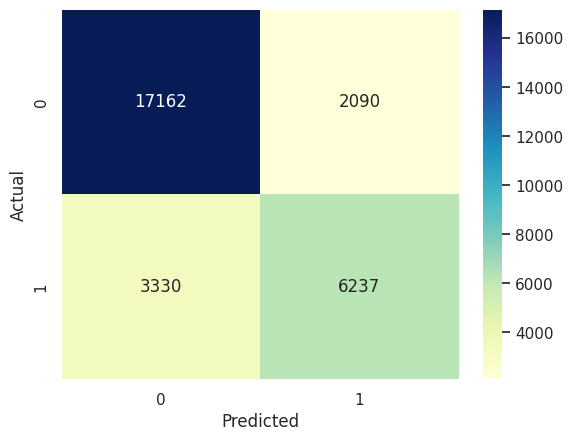

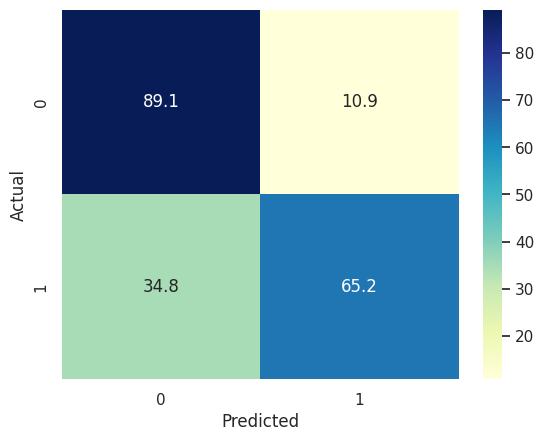

In [60]:
evaluate(clf, X_test, y_test, y_pred)

In [61]:
# Đánh giá độ chính xác
Kfold = KFold(n_splits= 10, shuffle = True, random_state = 42)
f1_scores = cross_val_score(clf,X_scaled,y_resampled, cv=Kfold, scoring='f1')
accuracy_scores = cross_val_score(clf,X_scaled,y_resampled, cv=Kfold, scoring='accuracy')
print(f'f1 of each fold: {f1_scores}')
print(f'accuracy of each fold: {accuracy_scores}')
print(f'mean f1 of Fold: {f1_scores.mean()}')
print(f'mean accuracy of Fold: {accuracy_scores.mean()}')

f1 of each fold: [0.6934215  0.70258335 0.70344359 0.70155777 0.68435075 0.69734313
 0.70131315 0.69766908 0.69088432 0.6943447 ]
accuracy of each fold: [0.81353227 0.8130465  0.81818182 0.81560136 0.81088209 0.81442154
 0.81331112 0.81754459 0.81067388 0.81025748]
mean f1 of Fold: 0.6966911352271971
mean accuracy of Fold: 0.813745265038636


In [62]:
from sklearn.tree import export_text
# Export the text representation of the decision tree
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

|--- Humidity3pm <= 0.66
|   |--- Rainfall <= 0.00
|   |   |--- Pressure3pm <= 0.51
|   |   |   |--- Humidity3pm <= 0.25
|   |   |   |   |--- Humidity3pm <= 0.15
|   |   |   |   |   |--- month <= 0.23
|   |   |   |   |   |   |--- RainToday <= 0.50
|   |   |   |   |   |   |   |--- Humidity3pm <= 0.12
|   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.47
|   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.47
|   |   |   |   |   |   |   |   |   |   |--- WindGustDir <= 0.70
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- WindGustDir >  0.70
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.47
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Pressure3pm >  0.47
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Humidity3pm >  0.12
|   |   |   |   |   |   |   |   |--- Humidity9am <= 0.13
|  

In [63]:
df_predict = df_predict.drop('RainTomorrow', axis = 1)
df_predict_scaled = scaler.fit_transform(df_predict)
predictions = clf.predict(df_predict_scaled)
df_predict['RainTomorrow'] = predictions

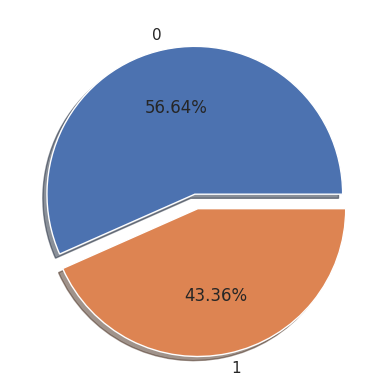

In [64]:
sizes = [df_predict.RainTomorrow[df_predict['RainTomorrow'] == 0].count(), df_predict.RainTomorrow[df_predict['RainTomorrow'] == 1].count()]
labels = ['0', '1']
plt.pie(sizes, labels=labels, explode=(0, 0.1), shadow=True, autopct='%.2f%%')
plt.show()

In [65]:
final_df = pd.concat([df_train, df_predict], axis = 0)
print(final_df.shape)
print(final_df.isnull().sum())

(125749, 13)
Location        0
Rainfall        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
RainToday       0
RainTomorrow    0
month           0
quarter         0
dtype: int64


In [66]:
final_df.RainTomorrow.value_counts()

0    97338
1    28411
Name: RainTomorrow, dtype: int64

# **MODELING**

In [67]:
#chia tập dữ liệu
X_new = final_df.drop('RainTomorrow', axis = 1)
y_new = final_df['RainTomorrow']

# Sử dụng SMOTE để tạo mẫu tổng hợp
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_new, y_new)
#chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
#Tạo một DataFrame từ mảng numpy
X_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=X.columns)
#split train -test
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state = 42)


## **Gradient Boosting**

**Baseline**

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [69]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

- ccp_alpha:

  - Giải thích: Đây là tham số điều chỉnh phạt gián đoạn đường cây. Nó kiểm soát sự phức tạp của cây quyết định bằng cách cắt bớt các nút lá mà cung cấp ít đóng góp cho sự phân loại.
  - Giá trị mặc định: 0.0 (không có phạt)
- criterion:

  - Giải thích: Xác định phương pháp tính giá trị mất mát trong quá trình xây dựng cây quyết định. Trong trường hợp này, 'friedman_mse' sử dụng mất mát Friedman's Mean Squared Error.
  - Giá trị mặc định: 'friedman_mse'
- init:

  - Giải thích: Xác định một mô hình tạm thời để sử dụng làm ước lượng ban đầu cho kết quả của mô hình Gradient Boosting.
  - Giá trị mặc định: None (không sử dụng mô hình tạm thời)
- learning_rate:

  - Giải thích: Điều chỉnh tỷ lệ học của mô hình. Nó kiểm soát mức độ cập nhật trọng số sau mỗi lần học.
  - Giá trị mặc định: 0.1
- loss:

  - Giải thích: Xác định hàm mất mát được sử dụng trong quá trình xây dựng mô hình. 'log_loss' thường được sử dụng cho bài toán phân loại.
  - Giá trị mặc định: 'log_loss'
- max_depth:

  - Giải thích: Điều chỉnh độ sâu tối đa của cây quyết định. Nó kiểm soát mức độ phức tạp của mô hình.
  - Giá trị mặc định: 3
- max_features:

  - Giải thích: Xác định số lượng đặc trưng tối đa được xem xét khi tìm kiếm phân chia tốt nhất trong mỗi nút.
  - Giá trị mặc định: None (sử dụng tất cả các đặc trưng)
- max_leaf_nodes:

  - Giải thích: Giới hạn số nút lá tối đa trong cây quyết định.
  - Giá trị mặc định: None (không giới hạn)
- min_impurity_decrease:

  - Giải thích: Điều chỉnh ngưỡng tối thiểu cho việc tăng sự tinh khiết của cây. Nếu việc tách một nút không tạo ra sự tinh khiết lớn hơn ngưỡng này, thì nút đó sẽ không được tách.
  - Giá trị mặc định: 0.0
- min_samples_leaf:

  - Giải thích: Xác định số mẫu tối thiểu yêu cầu để tạo ra một nút lá trong cây quyết định.
  - Giá trị mặc định: 1
- min_samples_split:

  - Giải thích: Xác định số mẫu tối thiểu yêu cầu để tách một nút trong cây quyết định.
  - Giá trị mặc định: 2
- min_weight_fraction_leaf:

  - Giải thích: Điều chỉnh trọng số tối thiểu của mẫu yêu cầu để tạo ra một nút lá.
  - Giá trị mặc định: 0.0
- n_estimators:

  - Giải thích: Số lượng cây quyết định trong ensemble (tổng số cây trong mô hình Gradient Boosting).
  - Giá trị mặc định: 100
- n_iter_no_change:

  - Giải thích: Số lần không có cải tiến trong hàm mất mát trước khi dừng quá trình huấn luyện. Dùng để kiểm soát việc dừng sớm của huấn luyện.
  - Giá trị mặc định: None (không kiểm tra)
- random_state:

  - Giải thích: Điểm khởi đầu cho ngẫu nhiên trong quá trình xây dựng cây và chọn mẫu. Giúp tái tạo kết quả huấn luyện.
  - Giá trị mặc định: 42
- subsample:

  - Giải thích: Xác định tỷ lệ mẫu con được sử dụng cho việc huấn luyện từ mẫu gốc. Giúp giảm overfitting.
  - Giá trị mặc định: 1.0 (sử dụng toàn bộ mẫu)
- tol:

  - Giải thích: Ngưỡng dừng sớm cho quá trình huấn luyện. Nếu thay đổi hàm mất mát thấp hơn ngưỡng này, quá trình dừng.
  - Giá trị mặc định

TEST RESULTS:

-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     19389
           1       0.78      0.63      0.70      9813

    accuracy                           0.82     29202
   macro avg       0.81      0.77      0.78     29202
weighted avg       0.81      0.82      0.81     29202


Average Accuracy:	0.8140

Standard Deviation:	0.0066



Confusion Matrix
-----------------------------------------------------


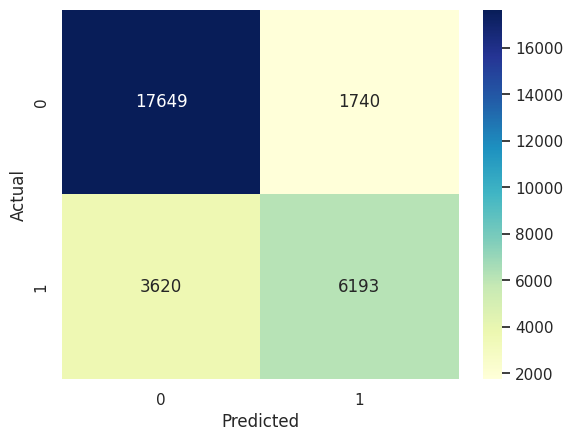

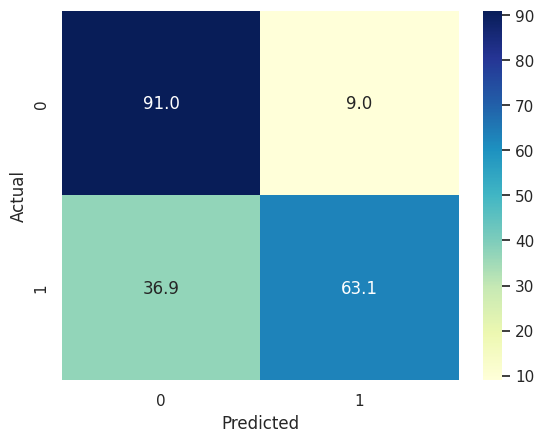

In [ ]:
y_pred = gbc.predict(X_test)
evaluate(gbc, X_test=X_test,y_test=y_test, y_pred=y_pred)

In [ ]:
# Đánh giá độ chính xác
Kfold = KFold(n_splits=10, shuffle=True, random_state=42)
f1_scores = cross_val_score(gbc,X_resampled_scaled,y_resampled, cv=Kfold, scoring='f1')
accuracy_scores = cross_val_score(gbc,X_resampled_scaled,y_resampled, cv=Kfold, scoring='accuracy')
print(f'f1 of each fold: {f1_scores}')
print(f'accuracy of each fold: {accuracy_scores}')
print(f'mean f1 of Fold: {f1_scores.mean()}')
print(f'mean accuracy of Fold: {accuracy_scores.mean()}')

f1 of each fold: [0.69467787 0.69752594 0.69451101 0.69382632 0.70536642 0.70200046
 0.69520312 0.69278351 0.69602724 0.69435666]
accuracy of each fold: [0.81336895 0.81830012 0.81665639 0.81624546 0.82514896 0.82247791
 0.81809465 0.81631395 0.8165879  0.81453325]
mean f1 of Fold: 0.696627854027295
mean accuracy of Fold: 0.8177727552907335


**Hyperparameter Tuning**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350],
    'max_depth': [ 6, 8, 10, 12, 14, 16, 20],
}
gbc = GradientBoostingClassifier(random_state=42)
scorer = make_scorer(f1_score)

In [ ]:
# grid_search = GridSearchCV(gbc,
#                            param_grid,
#                            scoring=scorer,
#                            cv=Kfold,
#                            error_score='raise')
# result = grid_search.fit(X_resampled_scaled,y_resampled)
# # summarize results
# print("Best: %f using %s" % (result.best_score_, result.best_params_))

**Final Model GDB**

In [71]:
best_model_gbc = GradientBoostingClassifier(random_state=42, max_depth = 20, n_estimators = 350)
best_model_gbc.fit(X_train, y_train)
y_pred_gbc = best_model_gbc.predict(X_test)

TEST RESULTS:

-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19389
           1       0.85      0.75      0.80      9813

    accuracy                           0.87     29202
   macro avg       0.87      0.84      0.85     29202
weighted avg       0.87      0.87      0.87     29202


Average Accuracy:	0.8197

Standard Deviation:	0.0074



Confusion Matrix
-----------------------------------------------------


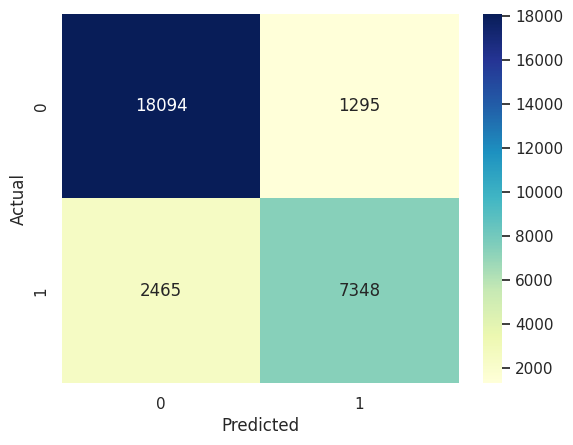

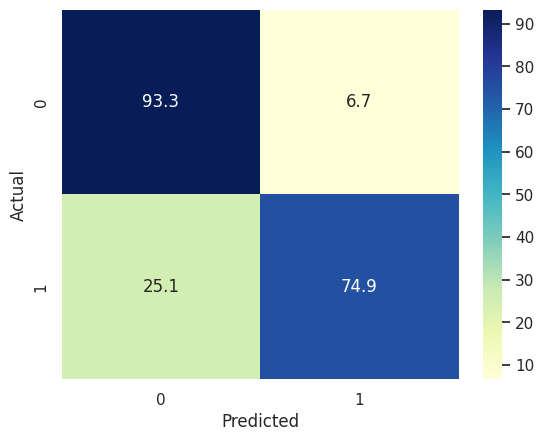

In [ ]:
evaluate(best_model_gbc, X_test=X_test,y_test=y_test, y_pred=y_pred_gbc)

In [ ]:
# Đánh giá độ chính xác
# Kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# f1_scores = cross_val_score(best_model_gbc,X_resampled_scaled,y_resampled, cv=Kfold, scoring='f1')
# accuracy_scores = cross_val_score(best_model_gbc,X_resampled_scaled,y_resampled, cv=Kfold, scoring='accuracy')
# print(f'f1 of each fold: {f1_scores}')
# print(f'accuracy of each fold: {accuracy_scores}')
# print(f'mean f1 of Fold: {f1_scores.mean()}')
# print(f'mean accuracy of Fold: {accuracy_scores.mean()}')

In [77]:
Accuracy={}

In [78]:
Accuracy_GradientBoostClassifier=round((0.8521*100),2)
print("Accuracy_GradientBoostClassifier : ",Accuracy_GradientBoostClassifier,"%")
Accuracy["GradientBoostClassifier"]= Accuracy_GradientBoostClassifier

Accuracy_GradientBoostClassifier :  85.21 %


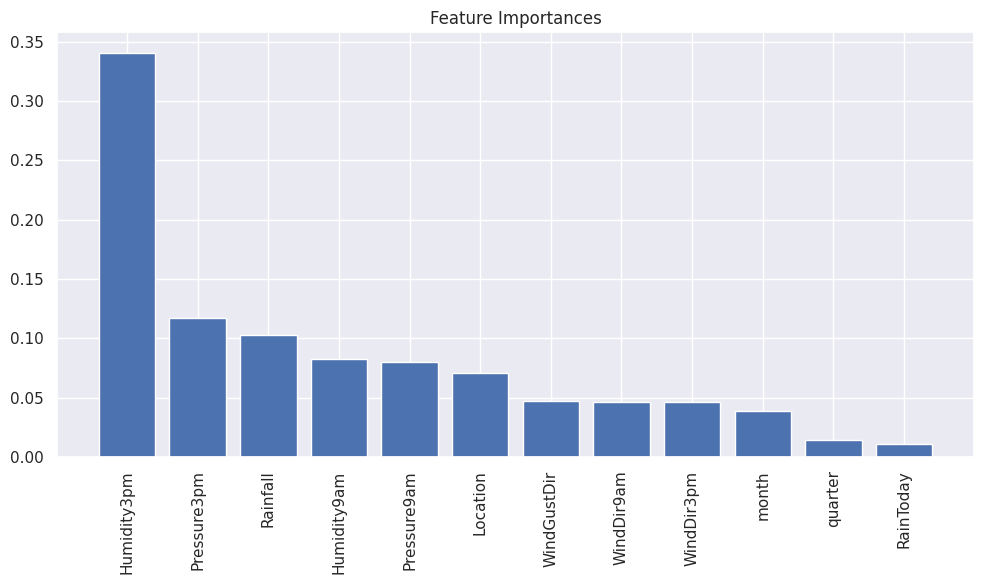

In [ ]:
# best_model_xgb.fit(X_train_scaled_to_df, y_resampled)
importances = best_model_gbc.feature_importances_

# Lấy tên của các đặc trưng
feature_names = X_train.columns

# Xếp hạng tính quan trọng của đặc trưng
indices = importances.argsort()[::-1]

# Trực quan hóa tính quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# import xgboost
# # Số lượng cây trong mô hình
# num_trees = len(best_model_gbc.get_booster().get_dump())

# # Vẽ toàn bộ cây với Agg renderer và kích thước nhỏ hơn
# plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước ở đây
# for i in range(num_trees):
#     plt.subplot(1, num_trees, i+1)
#     xgboost.plot_tree(best_model_gbc, num_trees=i, rankdir='LR', ax=plt.gca(), renderer='Agg')
# plt.show()

In [ ]:
filtered_columns = [col for col in final_df.columns if col != 'RainTomorrow']
filtered_df = final_df[filtered_columns]
# Lấy cây cuối cùng trong ensemble
last_tree = best_model_gbc.estimators_[-1][0]

# In ra cây cuối cùng
tree_text = export_text(last_tree, feature_names=filtered_df.columns.tolist())
print(tree_text)

|--- Humidity3pm <= 0.64
|   |--- Humidity3pm <= 0.64
|   |   |--- Humidity3pm <= 0.63
|   |   |   |--- Rainfall <= 0.00
|   |   |   |   |--- RainToday <= 0.50
|   |   |   |   |   |--- WindDir9am <= 0.37
|   |   |   |   |   |   |--- Humidity9am <= 0.70
|   |   |   |   |   |   |   |--- Humidity9am <= 0.69
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.41
|   |   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.39
|   |   |   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.38
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- Humidity3pm >  0.38
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- Humidity3pm >  0.39
|   |   |   |   |   |   |   |   |   |   |--- month <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- month >  0.50
|   |   |   |   |   |   |   |   | 

## **XGBoost**
- Sử dụng Smote 50% cho class thiểu số để dữ liệu không thay đổi quá nhiều so với ban đầu.
- sử dụng KFold để tách dữ liệu thành nhiều phần, thực hiện cross validation
- Sử dụng GridSearchCV để tìm kiếm hyperparameter cho mô hình.
- Sử dụng 2 thông số n_estimator và maxdepth để tối ưu hóa mô hình.
- Sử dụng phương pháp cross validation để thực hiện train và test model

***Baseline***

In [ ]:
xgb.get_params()

AttributeError: ignored

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)
evaluate(xgb, X_test=X_test,y_test=y_test, y_pred=y_pred)

In [ ]:
# Đánh giá độ chính xác
Kfold = KFold(n_splits=10, shuffle=True, random_state=42)
f1_scores = cross_val_score(xgb,X_resampled_scaled,y_resampled, cv=Kfold, scoring='f1')
accuracy_scores = cross_val_score(xgb,X_resampled_scaled,y_resampled, cv=Kfold, scoring='accuracy')
print(f'f1 of each fold: {f1_scores}')
print(f'accuracy of each fold: {accuracy_scores}')
print(f'mean f1 of Fold: {f1_scores.mean()}')
print(f'mean accuracy of Fold: {accuracy_scores.mean()}')

**Hyperparameter Tuning**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350],
    'max_depth': [ 6, 8, 10, 12, 14, 16],
}
xgb_model = XGBClassifier(random_state=42)
scorer = make_scorer(f1_score)

In [ ]:
grid_search = GridSearchCV(xgb_model,
                           param_grid,
                           scoring=scorer,
                           cv=Kfold,
                           error_score='raise')
result = grid_search.fit(X_resampled_scaled,y_resampled)
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

**Final Model XGBoost**

TEST RESULTS:

-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     19505
           1       0.83      0.76      0.79      9697

    accuracy                           0.87     29202
   macro avg       0.86      0.84      0.85     29202
weighted avg       0.87      0.87      0.87     29202


Average Accuracy:	0.8343

Standard Deviation:	0.0062



Confusion Matrix
-----------------------------------------------------


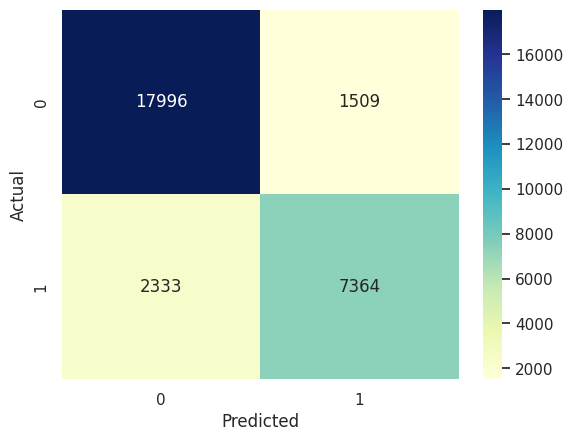

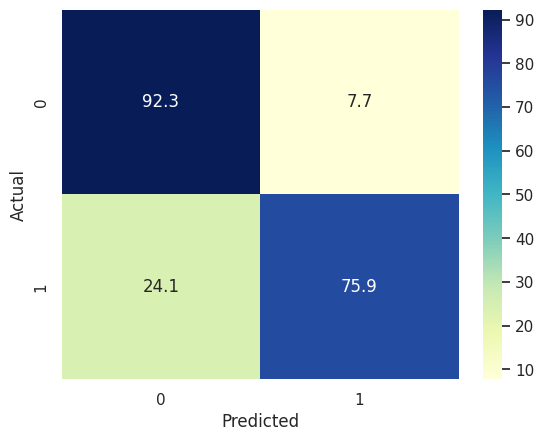

In [74]:
best_model_xgb = XGBClassifier(random_state=42, max_depth = 16, n_estimators = 350)
best_model_xgb.fit(X_train, y_train)
y_pred = best_model_xgb.predict(X_test)
evaluate(best_model_xgb, X_test=X_test,y_test=y_test, y_pred=y_pred)

In [75]:
# Đánh giá độ chính xác
Kfold = KFold(n_splits=10, shuffle=True, random_state=42)
f1_scores = cross_val_score(best_model_xgb,X_resampled_scaled,y_resampled, cv=Kfold, scoring='f1')
accuracy_scores = cross_val_score(best_model_xgb,X_resampled_scaled,y_resampled, cv=Kfold, scoring='accuracy')
print(f'f1 of each fold: {f1_scores}')
print(f'accuracy of each fold: {accuracy_scores}')
print(f'mean f1 of Fold: {f1_scores.mean()}')
print(f'mean accuracy of Fold: {accuracy_scores.mean()}')

f1 of each fold: [0.79560721 0.79333117 0.79347116 0.80446222 0.80306464 0.80272254
 0.7928465  0.7962685  0.79788584 0.8036433 ]
accuracy of each fold: [0.86870762 0.86925553 0.8700089  0.87274844 0.87500856 0.87295391
 0.86672146 0.86986301 0.8690411  0.8730137 ]
mean f1 of Fold: 0.7983303057280187
mean accuracy of Fold: 0.8707322232573673


In [79]:
Accuracy_XGBoostClassifier=round((accuracy_scores.mean()*100),2)
print("Accuracy_XGBoostClassifier : ",Accuracy_XGBoostClassifier,"%")
Accuracy["XGBoostClassifier"]=Accuracy_XGBoostClassifier

Accuracy_XGBoostClassifier :  87.07 %


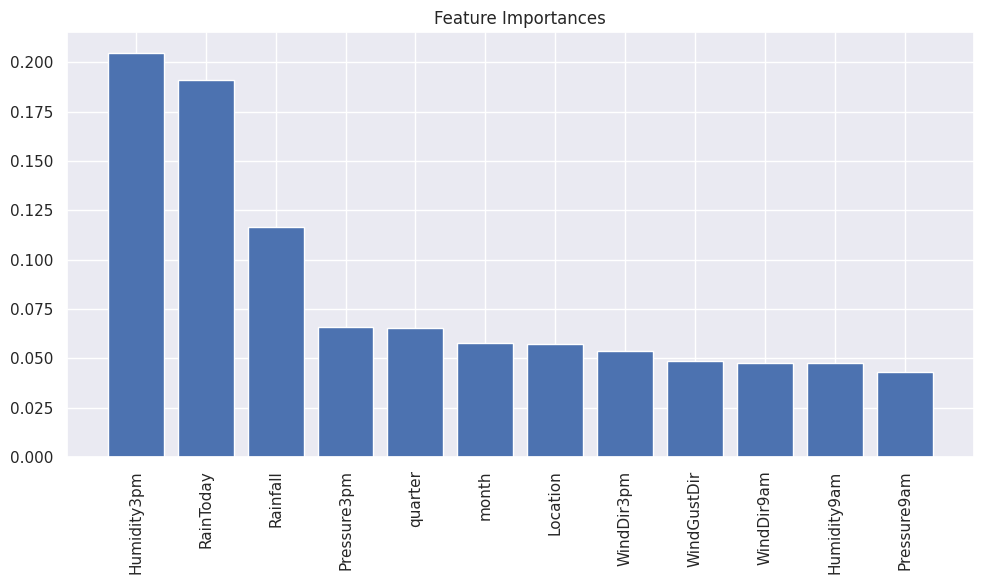

In [80]:
# best_model_xgb.fit(X_train_scaled_to_df, y_resampled)
importances = best_model_xgb.feature_importances_

# Lấy tên của các đặc trưng
feature_names = X_train.columns

# Xếp hạng tính quan trọng của đặc trưng
indices = importances.argsort()[::-1]

# Trực quan hóa tính quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Trích xuất cây cuối cùng từ mô hình
final_tree = best_model_xgb.get_booster().get_dump()[-1]

# Chuyển cây thành một danh sách các dòng
tree_lines = final_tree.split('\n')

# In ra quy tắc từ cây
for line in tree_lines:
    print(line)

# **MODEL COMPARISONS**

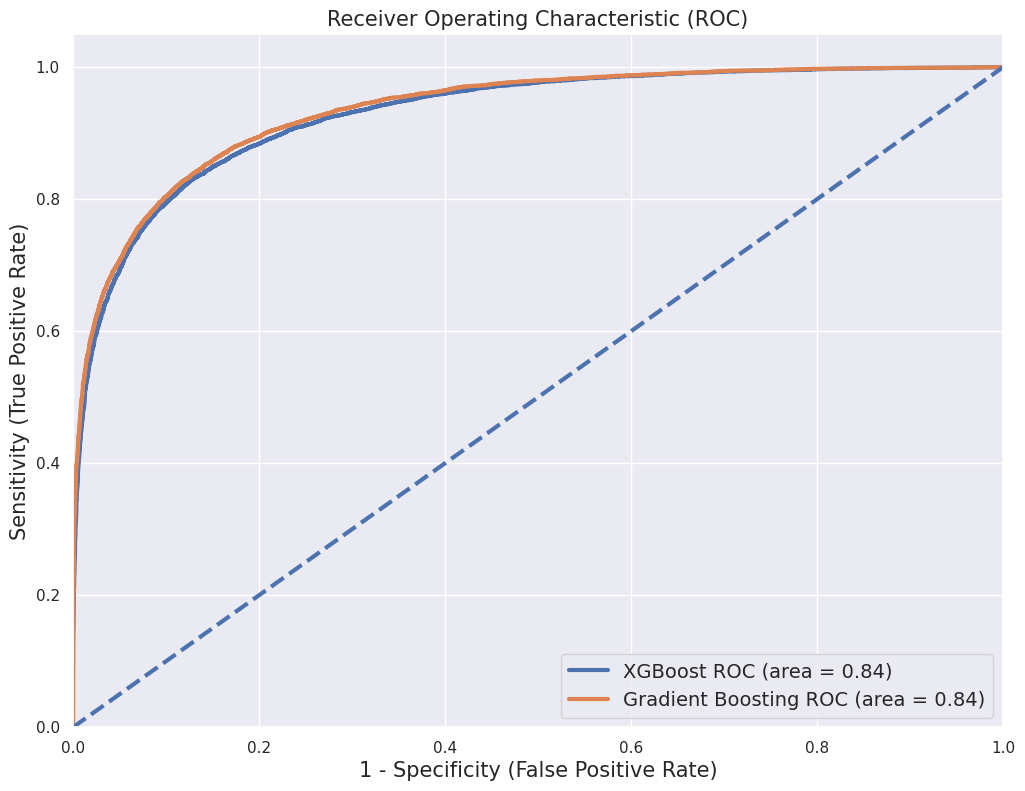

In [85]:
plt.figure(figsize=(12,9))
models = [
{
    'label': 'XGBoost',
    'model': best_model_xgb,
},
{
    'label': 'Gradient Boosting',
    'model': best_model_gbc,
}
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr, tpr, linestyle='-', linewidth=3, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'b--', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=14)
plt.savefig("roc_curves.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

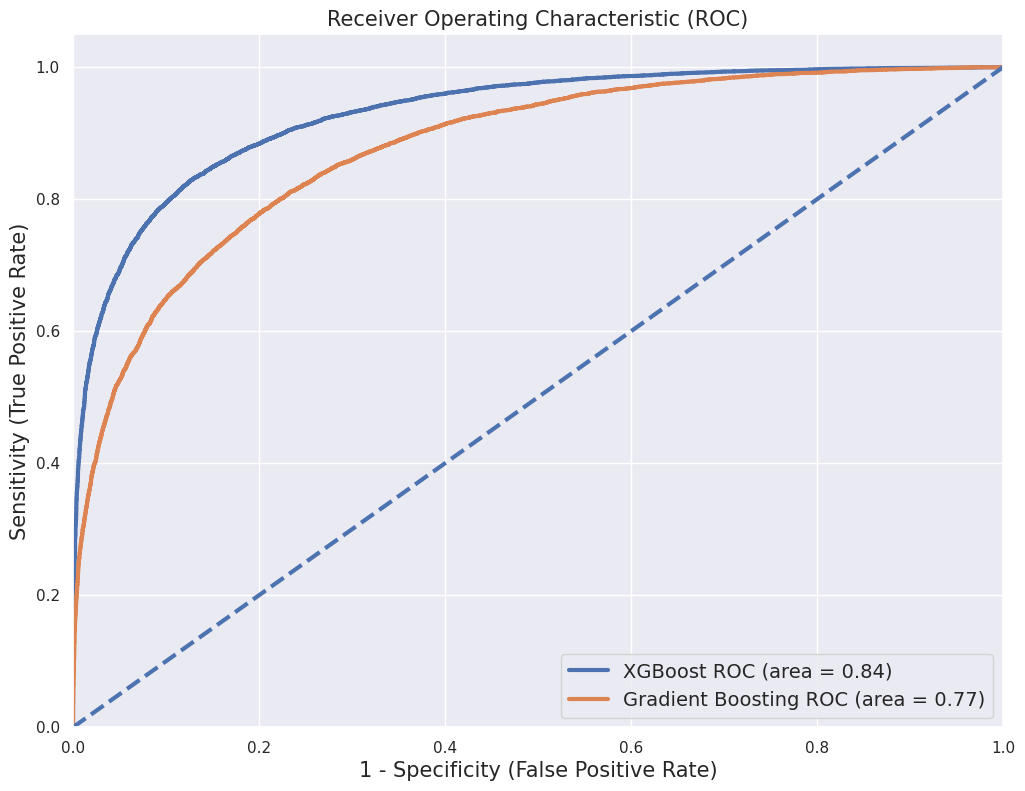

In [86]:
plt.figure(figsize=(12,9))
models = [
{
    'label': 'XGBoost',
    'model': best_model_xgb,
},
{
    'label': 'Gradient Boosting',
    'model': gbc,
}
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr, tpr, linestyle='-', linewidth=3, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'b--', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=14)
plt.savefig("roc_curves.png", format='png', dpi=100, bbox_inches='tight')
plt.show()